# Step 1
## Importing data and viewing it

<b> Import CSV 'cbg_patterns.csv' </b>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import operator

In [2]:
pwd

'/Users/colinechabloz/Desktop'

In [3]:
filename1 = '/Users/colinechabloz/Desktop/Datasets/cbg_patterns.csv'

In [4]:
data1 = pd.read_csv(filename1, dtype={'census_block_group':str})

<b> Observe head </b>

In [5]:
data1.head()

,census_block_group,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,popularity_by_day
0,010059508001,1538352000,1541030400,75122.0,18314.0,"{""010059501003"":127,""010059509001"":111,""010059...","{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]","[2617,2457,2403,2519,2646,3007,3886,7566,5508,...","{""Monday"":12000,""Tuesday"":12224,""Wednesday"":10..."
1,010090506011,1538352000,1541030400,95649.0,38942.0,"{""010730113021"":210,""010090506022"":205,""010090...","{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],"[6556,6325,6222,6355,6586,7350,8568,8099,7378,...","{""Monday"":12125,""Tuesday"":12984,""Wednesday"":12..."
2,010479572002,1538352000,1541030400,14009.0,3039.0,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","[807,790,796,786,851,951,1134,1797,1355,1241,1...","{""Monday"":2314,""Tuesday"":2340,""Wednesday"":2195..."
3,010690404001,1538352000,1541030400,128169.0,25418.0,"{""010690402013"":370,""010690402011"":322,""010690...","{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...","[2121,1828,1784,1704,1861,2373,3730,7497,7093,...","{""Monday"":21141,""Tuesday"":21143,""Wednesday"":17..."
4,010730112101,1538352000,1541030400,51453.0,9499.0,"{""010090507001"":183,""010730113021"":167,""010730...","{""010730045001"":140,""010730027001"":123,""010730...",18878.0,"[""Chevron"",""Daylight Donuts"",""walmart""]","[""walmart"",""Chevron"",""Dollar General"",""Shell O...","[""Chevron"",""CrossFit""]","[3804,3716,3686,3672,3735,4115,4855,5946,4526,...","{""Monday"":8402,""Tuesday"":8414,""Wednesday"":8550..."


<b> Observe data shape </b>

In [6]:
data1.shape

(220735, 13)

<b> Observe type </b>

In [7]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220735 entries, 0 to 220734
Data columns (total 13 columns):
census_block_group          220734 non-null object
date_range_start            220735 non-null int64
date_range_end              220735 non-null int64
raw_visit_count             220629 non-null float64
raw_visitor_count           220629 non-null float64
visitor_home_cbgs           220735 non-null object
visitor_work_cbgs           220735 non-null object
distance_from_home          220518 non-null float64
related_same_day_brand      220735 non-null object
related_same_month_brand    220735 non-null object
top_brands                  220735 non-null object
popularity_by_hour          220735 non-null object
popularity_by_day           220735 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 21.9+ MB


<b> Delete unnecessary columns </b>

In [8]:
del data1['date_range_start']
del data1['date_range_end']

Check that columns have disappeared

In [9]:
data1.head()

,census_block_group,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,popularity_by_day
0,010059508001,75122.0,18314.0,"{""010059501003"":127,""010059509001"":111,""010059...","{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]","[2617,2457,2403,2519,2646,3007,3886,7566,5508,...","{""Monday"":12000,""Tuesday"":12224,""Wednesday"":10..."
1,010090506011,95649.0,38942.0,"{""010730113021"":210,""010090506022"":205,""010090...","{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],"[6556,6325,6222,6355,6586,7350,8568,8099,7378,...","{""Monday"":12125,""Tuesday"":12984,""Wednesday"":12..."
2,010479572002,14009.0,3039.0,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","[807,790,796,786,851,951,1134,1797,1355,1241,1...","{""Monday"":2314,""Tuesday"":2340,""Wednesday"":2195..."
3,010690404001,128169.0,25418.0,"{""010690402013"":370,""010690402011"":322,""010690...","{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...","[2121,1828,1784,1704,1861,2373,3730,7497,7093,...","{""Monday"":21141,""Tuesday"":21143,""Wednesday"":17..."
4,010730112101,51453.0,9499.0,"{""010090507001"":183,""010730113021"":167,""010730...","{""010730045001"":140,""010730027001"":123,""010730...",18878.0,"[""Chevron"",""Daylight Donuts"",""walmart""]","[""walmart"",""Chevron"",""Dollar General"",""Shell O...","[""Chevron"",""CrossFit""]","[3804,3716,3686,3672,3735,4115,4855,5946,4526,...","{""Monday"":8402,""Tuesday"":8414,""Wednesday"":8550..."


<b> Check if there are <i> null </i> rows in key column  </b>

In [10]:
data1[data1['census_block_group'].isna()]

,census_block_group,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,popularity_by_day
220734,NaN,NaN,NaN,{},{},NaN,[],[],[],[],{}


<b> Remove <i> null </i> row/s in key column </b>

In [11]:
data1 = data1.dropna(subset=['census_block_group'])

Check that one row was removed

In [12]:
data1.shape

(220734, 11)

<b> Check statistics </b>

In [13]:
data1.describe()

,raw_visit_count,raw_visitor_count,distance_from_home
count,2.206290e+05,2.206290e+05,2.205180e+05
mean,4.793066e+04,1.182032e+04,3.511280e+04
std,6.252655e+04,3.045832e+04,9.973193e+04
min,6.000000e+01,5.000000e+01,7.060000e+02
25%,1.704200e+04,3.430000e+03,8.584000e+03
50%,3.064000e+04,6.541000e+03,1.461400e+04
75%,5.667800e+04,1.309900e+04,3.139775e+04
max,7.179900e+06,6.113949e+06,6.297845e+06


<b> Import CSV 'cbg_geographic_data.csv' </b>

In [14]:
filename2 = '/Users/colinechabloz/Desktop/Datasets/cbg_geographic_data.csv'
data2 = pd.read_csv(filename2, dtype={'census_block_group':str})

<b> Observe head </b>

In [15]:
data2.head()

,census_block_group,amount_land,amount_water,latitude,longitude
0,010010201001,4254524.0,23431,32.465829,-86.489614
1,010010201002,5568295.0,0,32.485849,-86.489690
2,010010202001,2058380.0,0,32.480082,-86.474974
3,010010202002,1283506.0,5968,32.464435,-86.469766
4,010010203001,3866515.0,9054,32.480175,-86.460793


<b> Observe data shape </b>

In [16]:
data2.shape

(220333, 5)

<b> Observe type </b>

In [17]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220333 entries, 0 to 220332
Data columns (total 5 columns):
census_block_group    220333 non-null object
amount_land           220333 non-null float64
amount_water          220333 non-null int64
latitude              220333 non-null float64
longitude             220333 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 8.4+ MB


<b> Delete unnecessary columns </b>

In [18]:
del data2['amount_land']
del data2['amount_water']

Check that columns have disappeared

In [19]:
data2.head()

,census_block_group,latitude,longitude
0,010010201001,32.465829,-86.489614
1,010010201002,32.485849,-86.489690
2,010010202001,32.480082,-86.474974
3,010010202002,32.464435,-86.469766
4,010010203001,32.480175,-86.460793


In [20]:
data2.shape

(220333, 3)

<b> Check if there are <i> null </i> rows in key column  </b>

In [21]:
data2[data2['census_block_group'].isna()]

,census_block_group,latitude,longitude


<b> Check statistics </b>

In [22]:
data2.describe()

,latitude,longitude
count,220333.000000,220333.000000
mean,37.682385,-91.145732
std,5.518045,16.278313
min,17.901633,-175.860041
25%,33.986036,-97.595451
50%,38.920937,-86.723104
75%,41.480645,-79.396160
max,71.249841,178.338813


Observations: data2 contains 220333 rows, data1 contains 220734 rows. This is a difference of 401 rows. 
<p> I need to analyze 3 cases: </p>
    <p> 1) Some rows are present in data1 and in data2 </p>
    <p> 2) Some rows are present in data1 and not in data2 </p>
    <p> 3) Some rows are present in data2 and not in data1 </p>

<b> Case 1) Some rows are present in data1 and in data2 </b>

In [23]:
s1 = data1.merge(data2)

In [24]:
s1.shape

(220331, 13)

220331 rows are in common between data1 and data2

In [25]:
s1[s1['census_block_group'].isna()]

,census_block_group,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,popularity_by_day,latitude,longitude


Second way to check common rows between data1 and data2

In [26]:
common = data1.merge(data2,on=['census_block_group'])

In [27]:
common.shape

(220331, 13)

In [28]:
common.head()

,census_block_group,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,popularity_by_day,latitude,longitude
0,010059508001,75122.0,18314.0,"{""010059501003"":127,""010059509001"":111,""010059...","{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]","[2617,2457,2403,2519,2646,3007,3886,7566,5508,...","{""Monday"":12000,""Tuesday"":12224,""Wednesday"":10...",31.920410,-85.175741
1,010090506011,95649.0,38942.0,"{""010730113021"":210,""010090506022"":205,""010090...","{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],"[6556,6325,6222,6355,6586,7350,8568,8099,7378,...","{""Monday"":12125,""Tuesday"":12984,""Wednesday"":12...",33.863884,-86.903514
2,010479572002,14009.0,3039.0,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","[807,790,796,786,851,951,1134,1797,1355,1241,1...","{""Monday"":2314,""Tuesday"":2340,""Wednesday"":2195...",32.357337,-87.014004
3,010690404001,128169.0,25418.0,"{""010690402013"":370,""010690402011"":322,""010690...","{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...","[2121,1828,1784,1704,1861,2373,3730,7497,7093,...","{""Monday"":21141,""Tuesday"":21143,""Wednesday"":17...",31.237327,-85.426331
4,010730112101,51453.0,9499.0,"{""010090507001"":183,""010730113021"":167,""010730...","{""010730045001"":140,""010730027001"":123,""010730...",18878.0,"[""Chevron"",""Daylight Donuts"",""walmart""]","[""walmart"",""Chevron"",""Dollar General"",""Shell O...","[""Chevron"",""CrossFit""]","[3804,3716,3686,3672,3735,4115,4855,5946,4526,...","{""Monday"":8402,""Tuesday"":8414,""Wednesday"":8550...",33.671800,-86.690610


<b> Case 2) Some rows are present in data1 and not in data2 </b>

In [29]:
s1 = set(data1['census_block_group'])
s2 = set(data2['census_block_group'])

In [30]:
s3 = s1.difference(s2)
len(s3)

403

<b> Case 3) Some rows are present in data2 and not in data1 </b>

In [31]:
s4 = s2.difference(s1)
len(s4)

2

# Step 2
#### Identify and group columns for first analysis
<p> <b> Group 1: </b> Key column </p>

<b> Select only column ‘census_block_group’ </b>

In [32]:
common_key = common[['census_block_group']].copy()

<b> Check that first character is a number and create a table counting the number of rows per first character </b>

In [33]:
common_key['first'] = common_key['census_block_group'].str[:1]

In [34]:
common_key.groupby('first').count()

,census_block_group
first,
0,39626
1,36970
2,38090
3,44430
4,41493
5,17128
7,2594


<b> Interpretation: </b> all cbgs start with a number in this range {0,1,2,3,4,5,7}, the majority starting with '3'

<b> Check that last character is a number and create a table counting the number of rows per last character </b>

In [35]:
common_key['last'] = common_key['census_block_group'].str[-1]

In [36]:
common_key.groupby('last')['last'].count()

last
0      598
1    73642
2    68035
3    45911
4    22073
5     7460
6     2082
7      452
8       67
9       11
Name: last, dtype: int64

<b> Interpretation: </b> all cbgs end with a number in this range {0:9}, the majority ending with '1'

<b> Check length </b>

In [37]:
common_key['slen'] = common_key['census_block_group'].str.len()

In [38]:
common_key.groupby('slen')['slen'].count()

slen
12    220331
Name: slen, dtype: int64

<b> Interpretation: </b> The key column contains 220331 rows, all of length '12' 

<b> Check that 'census_block_group' is a unique identifier </b>

In [39]:
common_key['census_block_group'].is_unique

True

<b> Group 2: </b> Columns starting with { </p>

<b> Select only columns ‘visitor_home_cbgs’, ‘visitor_work_cbgs’, and ‘popularity_by_day’ </b>

In [40]:
common_dict = common[['visitor_home_cbgs', 'visitor_work_cbgs', 'popularity_by_day']].copy()

<b> Add index </b>

In [41]:
common_dict['index_col'] = common_dict.index

Check that index column was added

In [42]:
#pd.set_option('display.max_colwidth', -1) #show all content of the columns
common_dict['popularity_by_day'].head()

0    {"Monday":12000,"Tuesday":12224,"Wednesday":10...
1    {"Monday":12125,"Tuesday":12984,"Wednesday":12...
2    {"Monday":2314,"Tuesday":2340,"Wednesday":2195...
3    {"Monday":21141,"Tuesday":21143,"Wednesday":17...
4    {"Monday":8402,"Tuesday":8414,"Wednesday":8550...
Name: popularity_by_day, dtype: object

<b> Unpivot other columns than Index </b>

In [43]:
common_dict_melt = pd.melt(common_dict, id_vars=['index_col'])

In [44]:
common_dict_melt.head()

,index_col,variable,value
0,0,visitor_home_cbgs,"{""010059501003"":127,""010059509001"":111,""010059..."
1,1,visitor_home_cbgs,"{""010730113021"":210,""010090506022"":205,""010090..."
2,2,visitor_home_cbgs,"{""010479567011"":67,""010479567021"":60}"
3,3,visitor_home_cbgs,"{""010690402013"":370,""010690402011"":322,""010690..."
4,4,visitor_home_cbgs,"{""010090507001"":183,""010730113021"":167,""010730..."


<p> <b> Remove {} <b/> </p>

In [45]:
common_dict_melt['value'] = common_dict_melt['value'].map(lambda x: x.lstrip('{').rstrip('}'))

In [46]:
common_dict_melt.head()

,index_col,variable,value
0,0,visitor_home_cbgs,"""010059501003"":127,""010059509001"":111,""0100595..."
1,1,visitor_home_cbgs,"""010730113021"":210,""010090506022"":205,""0100905..."
2,2,visitor_home_cbgs,"""010479567011"":67,""010479567021"":60"
3,3,visitor_home_cbgs,"""010690402013"":370,""010690402011"":322,""0106904..."
4,4,visitor_home_cbgs,"""010090507001"":183,""010730113021"":167,""0107301..."


In [47]:
common_dict_melt.iloc[-5:]

,index_col,variable,value
660988,220326,popularity_by_day,
660989,220327,popularity_by_day,
660990,220328,popularity_by_day,
660991,220329,popularity_by_day,
660992,220330,popularity_by_day,


<b> Split column by delimiter ',' </b>

In [49]:
common_dict_melt_split = pd.concat([common_dict_melt, common_dict_melt['value'].str.split(',', expand=True)], axis=1)

In [50]:
common_dict_melt_split.head()

,index_col,variable,value,0,1,2,3,4,5,6,...,926,927,928,929,930,931,932,933,934,935
0,0,visitor_home_cbgs,"""010059501003"":127,""010059509001"":111,""0100595...","""010059501003"":127","""010059509001"":111","""010059509002"":106","""010059505001"":102","""010059506002"":92","""010059508002"":82","""010059505003"":64",...,None,None,None,None,None,None,None,None,None,None
1,1,visitor_home_cbgs,"""010730113021"":210,""010090506022"":205,""0100905...","""010730113021"":210","""010090506022"":205","""010090506024"":164","""010730115001"":145","""010730117041"":135","""010830212001"":130","""010730114004"":126",...,None,None,None,None,None,None,None,None,None,None
2,2,visitor_home_cbgs,"""010479567011"":67,""010479567021"":60","""010479567011"":67","""010479567021"":60",None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,3,visitor_home_cbgs,"""010690402013"":370,""010690402011"":322,""0106904...","""010690402013"":370","""010690402011"":322","""010690402021"":275","""010690402022"":206","""010690409002"":201","""010690421002"":200","""010690401001"":177",...,None,None,None,None,None,None,None,None,None,None
4,4,visitor_home_cbgs,"""010090507001"":183,""010730113021"":167,""0107301...","""010090507001"":183","""010730113021"":167","""010730112071"":132","""010090507003"":129","""010730112061"":115","""010730112062"":110","""010730112051"":103",...,None,None,None,None,None,None,None,None,None,None


In [51]:
common_dict_melt_split.iloc[-3:]

,index_col,variable,value,0,1,2,3,4,5,6,...,926,927,928,929,930,931,932,933,934,935
660990,220328,popularity_by_day,,,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
660991,220329,popularity_by_day,,,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
660992,220330,popularity_by_day,,,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [52]:
del common_dict_melt_split['value']

In [53]:
common_dict_melt_split.head()

,index_col,variable,0,1,2,3,4,5,6,7,...,926,927,928,929,930,931,932,933,934,935
0,0,visitor_home_cbgs,"""010059501003"":127","""010059509001"":111","""010059509002"":106","""010059505001"":102","""010059506002"":92","""010059508002"":82","""010059505003"":64","""010059501002"":61",...,None,None,None,None,None,None,None,None,None,None
1,1,visitor_home_cbgs,"""010730113021"":210","""010090506022"":205","""010090506024"":164","""010730115001"":145","""010730117041"":135","""010830212001"":130","""010730114004"":126","""010830212002"":125",...,None,None,None,None,None,None,None,None,None,None
2,2,visitor_home_cbgs,"""010479567011"":67","""010479567021"":60",None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,3,visitor_home_cbgs,"""010690402013"":370","""010690402011"":322","""010690402021"":275","""010690402022"":206","""010690409002"":201","""010690421002"":200","""010690401001"":177","""010670305003"":172",...,None,None,None,None,None,None,None,None,None,None
4,4,visitor_home_cbgs,"""010090507001"":183","""010730113021"":167","""010730112071"":132","""010090507003"":129","""010730112061"":115","""010730112062"":110","""010730112051"":103","""010730111103"":90",...,None,None,None,None,None,None,None,None,None,None


<b> Filter on 'visitor_home_cbgs' </b>

In [54]:
common_dict_melt_split_vis_home = common_dict_melt_split.loc[common_dict_melt_split['variable'] == 'visitor_home_cbgs']

In [55]:
common_dict_melt_split_vis_home.head()

,index_col,variable,0,1,2,3,4,5,6,7,...,926,927,928,929,930,931,932,933,934,935
0,0,visitor_home_cbgs,"""010059501003"":127","""010059509001"":111","""010059509002"":106","""010059505001"":102","""010059506002"":92","""010059508002"":82","""010059505003"":64","""010059501002"":61",...,None,None,None,None,None,None,None,None,None,None
1,1,visitor_home_cbgs,"""010730113021"":210","""010090506022"":205","""010090506024"":164","""010730115001"":145","""010730117041"":135","""010830212001"":130","""010730114004"":126","""010830212002"":125",...,None,None,None,None,None,None,None,None,None,None
2,2,visitor_home_cbgs,"""010479567011"":67","""010479567021"":60",None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,3,visitor_home_cbgs,"""010690402013"":370","""010690402011"":322","""010690402021"":275","""010690402022"":206","""010690409002"":201","""010690421002"":200","""010690401001"":177","""010670305003"":172",...,None,None,None,None,None,None,None,None,None,None
4,4,visitor_home_cbgs,"""010090507001"":183","""010730113021"":167","""010730112071"":132","""010090507003"":129","""010730112061"":115","""010730112062"":110","""010730112051"":103","""010730111103"":90",...,None,None,None,None,None,None,None,None,None,None


In [56]:
common_dict_melt_split_vis_home_unpivot = pd.melt(common_dict_melt_split_vis_home, id_vars=['index_col','variable'])

In [57]:
common_dict_melt_split_vis_home_unpivot.head()

,index_col,variable,variable,value
0,0,0,0,"""010059501003"":127"
1,1,0,0,"""010730113021"":210"
2,2,0,0,"""010479567011"":67"
3,3,0,0,"""010690402013"":370"
4,4,0,0,"""010090507001"":183"


In [58]:
#calculate position of ':' for each row
# I should have "14" or "-1" or "NaN"
a = common_dict_melt_split_vis_home_unpivot['value'].str.find(':')

In [59]:
a.shape

(206229816,)

In [60]:
# try 1
np.unique(a)

array([-1., 14., nan, ..., nan, nan, nan])

In [61]:
# try 2
a.value_counts()


 14.0    4131721
-1.0       28032
Name: value, dtype: int64

In [62]:
#so the number of Nans is equal to:
print("Nan:    " + str(a.shape[0] - 4131721 - 28032))

Nan:    202070063


<b> Filter on 'visitor_work_cbgs' </b>

In [63]:
common_dict_melt_split_vis_work = common_dict_melt_split.loc[common_dict_melt_split['variable'] == 'visitor_work_cbgs']

In [64]:
common_dict_melt_split_vis_work.shape

(220331, 938)

In [65]:
common_dict_melt_split_vis_work_unpivot = pd.melt(common_dict_melt_split_vis_work, id_vars=['index_col','variable'])

In [66]:
common_dict_melt_split_vis_work_unpivot.head()

,index_col,variable,variable,value
0,0,0,0,"""010059501003"":109"
1,1,0,0,"""010890111001"":271"
2,2,0,0,"""010479567021"":52"
3,3,0,0,"""010690402024"":313"
4,4,0,0,"""010730045001"":140"


In [67]:
#calculate position of ':' for each row
# I should have "14" or "-1" or "NaN"
b = common_dict_melt_split_vis_work_unpivot['value'].str.find(':')

In [68]:
b.head()

0    14.0
1    14.0
2    14.0
3    14.0
4    14.0
Name: value, dtype: float64

In [69]:
b.value_counts()

 14.0    1795704
-1.0       50756
Name: value, dtype: int64

In [70]:
#so the number of Nans is equal to:
print("Nan:    " + str(b.shape[0] - 1795704 - 50756))

Nan:    204383356


<b> Filter on 'popularity_by_day' </b>

In [71]:
common_dict_melt_split_pop_day = common_dict_melt_split.loc[common_dict_melt_split['variable'] == 'popularity_by_day']

In [72]:
common_dict_melt_split_pop_day.shape

(220331, 938)

In [73]:
common_dict_melt_split_pop_day_unpivot = pd.melt(common_dict_melt_split_pop_day, id_vars=['index_col','variable'])

In [74]:
common_dict_melt_split_pop_day_unpivot.head()

,index_col,variable,variable,value
0,0,0,0,"""Monday"":12000"
1,1,0,0,"""Monday"":12125"
2,2,0,0,"""Monday"":2314"
3,3,0,0,"""Monday"":21141"
4,4,0,0,"""Monday"":8402"


In [75]:
#calculate position of ':' for each row
# I should have "8,9,10,11" or "-1" or "NaN"
c = common_dict_melt_split_pop_day_unpivot['value'].str.find(':')

In [76]:
c.value_counts()

 8.0     660720
 10.0    440480
 11.0    220240
 9.0     220240
-1.0         91
Name: value, dtype: int64

In [77]:
#so the number of Nans is equal to:
print("Nan:    " + str(c.shape[0] - 660720 - 440480 - 220240 - 220240))

Nan:    204688136


<b> Check that there is a all days of week in each row, order is the same</b>

In [78]:
#dictionary containing regex to compare to strings in every column
regex_dict = {0: "\"Monday\"\:[0-9]+", 1: "\"Tuesday\"\:[0-9]+", 2: "\"Wednesday\"\:[0-9]+",
              3: "\"Thursday\"\:[0-9]+", 4: "\"Friday\"\:[0-9]+", 5 :"\"Saturday\"\:[0-9]+", 6: "\"Sunday\"\:[0-9]+"}

# boolean list containing assertion on correctness of format
bool_list = []
for n in range(7):
    
    day_column = common_dict_melt_split_pop_day[n]
    evaluated_array = day_column.dropna().str.contains(regex_dict[n])
    bool_list.append(np.all(evaluated_array))

In [79]:
bool_list

[False, True, True, True, True, True, True]

So only the Monday column contains bad formatted values. Check what indexes are these values from:

In [80]:
monday_column = common_dict_melt_split_pop_day[0]
evaluated_monday_column = monday_column.dropna().str.contains(regex_dict[0])

In [81]:
np.where(evaluated_monday_column == False)

(array([220240, 220241, 220242, 220243, 220244, 220245, 220246, 220247,
        220248, 220249, 220250, 220251, 220252, 220253, 220254, 220255,
        220256, 220257, 220258, 220259, 220260, 220261, 220262, 220263,
        220264, 220265, 220266, 220267, 220268, 220269, 220270, 220271,
        220272, 220273, 220274, 220275, 220276, 220277, 220278, 220279,
        220280, 220281, 220282, 220283, 220284, 220285, 220286, 220287,
        220288, 220289, 220290, 220291, 220292, 220293, 220294, 220295,
        220296, 220297, 220298, 220299, 220300, 220301, 220302, 220303,
        220304, 220305, 220306, 220307, 220308, 220309, 220310, 220311,
        220312, 220313, 220314, 220315, 220316, 220317, 220318, 220319,
        220320, 220321, 220322, 220323, 220324, 220325, 220326, 220327,
        220328, 220329, 220330]),)

and those indices contain the value of an empty string ('')

In [82]:
monday_column.iloc[220240:220330]

660902     
660903     
660904     
660905     
660906     
660907     
660908     
660909     
660910     
660911     
660912     
660913     
660914     
660915     
660916     
660917     
660918     
660919     
660920     
660921     
660922     
660923     
660924     
660925     
660926     
660927     
660928     
660929     
660930     
660931     
         ..
660962     
660963     
660964     
660965     
660966     
660967     
660968     
660969     
660970     
660971     
660972     
660973     
660974     
660975     
660976     
660977     
660978     
660979     
660980     
660981     
660982     
660983     
660984     
660985     
660986     
660987     
660988     
660989     
660990     
660991     
Name: 0, Length: 90, dtype: object

<p> <b> Group 3: </b> Columns of type float </p>

<b> Select only columns ‘raw_visit_count’, ‘raw_visitor_count’, and ‘distance_from_home’ </b>

In [83]:
common_num = common[['raw_visit_count', 'raw_visitor_count', 'distance_from_home']].copy()

<b> Add index </b>

In [84]:
common_num['index_col'] = common_num.index

<b> Unpivot other columns than Index </b>

In [85]:
common_num_melt = pd.melt(common_num, id_vars=['index_col'])

In [86]:
common_num_melt.head()

,index_col,variable,value
0,0,raw_visit_count,75122.0
1,1,raw_visit_count,95649.0
2,2,raw_visit_count,14009.0
3,3,raw_visit_count,128169.0
4,4,raw_visit_count,51453.0


In [87]:
common_num_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660993 entries, 0 to 660992
Data columns (total 3 columns):
index_col    660993 non-null int64
variable     660993 non-null object
value        660654 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 15.1+ MB


In [88]:
common_num_melt.describe()

,index_col,value
count,660993.000000,6.606540e+05
mean,110165.000000,3.166037e+04
std,63604.129192,7.172509e+04
min,0.000000,5.000000e+01
25%,55082.000000,7.173000e+03
50%,110165.000000,1.498100e+04
75%,165248.000000,3.398100e+04
max,220330.000000,7.179900e+06


/Users/colinechabloz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.
/Users/colinechabloz/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/colinechabloz/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


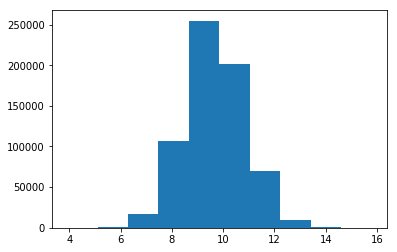

In [89]:
plt.hist(np.log(common_num_melt['value']))
plt.show()

<p> <b> Group 4: </b> Columns containing text of brands </p>

<b> Select only columns ‘related_same_day_brand’, ‘related_same_month_brand’, and ‘top_brands’ </b>

In [90]:
common_brand = common[['related_same_day_brand', 'related_same_month_brand', 'top_brands']]

In [91]:
common_brand.head()

,related_same_day_brand,related_same_month_brand,top_brands
0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]"
1,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[]
2,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]"
3,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc..."
4,"[""Chevron"",""Daylight Donuts"",""walmart""]","[""walmart"",""Chevron"",""Dollar General"",""Shell O...","[""Chevron"",""CrossFit""]"


<p> <b> Group 5: </b> Column 'popularity_by_hour' </p>

<b> Select only columns ‘popularity_by_hour’ </b>

In [92]:
common_poph = common[['popularity_by_hour']]

In [93]:
common_poph.head()

,popularity_by_hour
0,"[2617,2457,2403,2519,2646,3007,3886,7566,5508,..."
1,"[6556,6325,6222,6355,6586,7350,8568,8099,7378,..."
2,"[807,790,796,786,851,951,1134,1797,1355,1241,1..."
3,"[2121,1828,1784,1704,1861,2373,3730,7497,7093,..."
4,"[3804,3716,3686,3672,3735,4115,4855,5946,4526,..."


# Step 3
#### Split, format, rename columns and deal with NaN values

1) Column "popularity_by_hour"

In [94]:
#observe structure of column "popularity_by_hour"
common['popularity_by_hour'].head()

0    [2617,2457,2403,2519,2646,3007,3886,7566,5508,...
1    [6556,6325,6222,6355,6586,7350,8568,8099,7378,...
2    [807,790,796,786,851,951,1134,1797,1355,1241,1...
3    [2121,1828,1784,1704,1861,2373,3730,7497,7093,...
4    [3804,3716,3686,3672,3735,4115,4855,5946,4526,...
Name: popularity_by_hour, dtype: object

In [95]:
#split column popularity_by_hour into one column per hour
common.columns.str
common1 = pd.concat([common, common['popularity_by_hour'].str.split(',', 24, expand=True)], axis = 1)
common1.head()

,census_block_group,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,...,14,15,16,17,18,19,20,21,22,23
0,010059508001,75122.0,18314.0,"{""010059501003"":127,""010059509001"":111,""010059...","{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]","[2617,2457,2403,2519,2646,3007,3886,7566,5508,...",...,6769,8389,7113,7199,6001,5513,4453,3886,3611,3008]
1,010090506011,95649.0,38942.0,"{""010730113021"":210,""010090506022"":205,""010090...","{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],"[6556,6325,6222,6355,6586,7350,8568,8099,7378,...",...,8431,9784,10263,10830,9527,8885,8591,8240,7489,6930]
2,010479572002,14009.0,3039.0,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","[807,790,796,786,851,951,1134,1797,1355,1241,1...",...,1520,1695,1547,1511,1276,1122,1016,1000,924,866]
3,010690404001,128169.0,25418.0,"{""010690402013"":370,""010690402011"":322,""010690...","{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...","[2121,1828,1784,1704,1861,2373,3730,7497,7093,...",...,13176,13719,13754,13973,12287,9946,7051,4825,3330,2539]
4,010730112101,51453.0,9499.0,"{""010090507001"":183,""010730113021"":167,""010730...","{""010730045001"":140,""010730027001"":123,""010730...",18878.0,"[""Chevron"",""Daylight Donuts"",""walmart""]","[""walmart"",""Chevron"",""Dollar General"",""Shell O...","[""Chevron"",""CrossFit""]","[3804,3716,3686,3672,3735,4115,4855,5946,4526,...",...,4357,5631,6201,6547,5188,4647,4624,4412,4350,3988]


In [96]:
common1.shape

(220331, 37)

In [97]:
# keep only the number, remove []
common1[0] = common1[0].str.extract('(\d+)')
common1[23] = common1[23].str.extract('(\d+)')
common1.head()

,census_block_group,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,...,14,15,16,17,18,19,20,21,22,23
0,010059508001,75122.0,18314.0,"{""010059501003"":127,""010059509001"":111,""010059...","{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]","[2617,2457,2403,2519,2646,3007,3886,7566,5508,...",...,6769,8389,7113,7199,6001,5513,4453,3886,3611,3008
1,010090506011,95649.0,38942.0,"{""010730113021"":210,""010090506022"":205,""010090...","{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],"[6556,6325,6222,6355,6586,7350,8568,8099,7378,...",...,8431,9784,10263,10830,9527,8885,8591,8240,7489,6930
2,010479572002,14009.0,3039.0,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","[807,790,796,786,851,951,1134,1797,1355,1241,1...",...,1520,1695,1547,1511,1276,1122,1016,1000,924,866
3,010690404001,128169.0,25418.0,"{""010690402013"":370,""010690402011"":322,""010690...","{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...","[2121,1828,1784,1704,1861,2373,3730,7497,7093,...",...,13176,13719,13754,13973,12287,9946,7051,4825,3330,2539
4,010730112101,51453.0,9499.0,"{""010090507001"":183,""010730113021"":167,""010730...","{""010730045001"":140,""010730027001"":123,""010730...",18878.0,"[""Chevron"",""Daylight Donuts"",""walmart""]","[""walmart"",""Chevron"",""Dollar General"",""Shell O...","[""Chevron"",""CrossFit""]","[3804,3716,3686,3672,3735,4115,4855,5946,4526,...",...,4357,5631,6201,6547,5188,4647,4624,4412,4350,3988


In [98]:
#rename columns
common1.rename(columns={0: '1am', 1: '2am', 2: '3am', 3: '4am', 4: '5am', 5: '6am', 6: '7am', 7: '8am', 8: '9am', 9: '10am', 10: '11am', 11: '12pm', 12: '1pm', 13: '2pm', 14: '3pm', 15: '4pm', 16: '5pm', 17: '6pm', 18: '7pm', 19: '8pm', 20: '9pm', 21: '10pm', 22: '11pm', 23: '12am'}, inplace=True)
common1.head()

,census_block_group,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,...,3pm,4pm,5pm,6pm,7pm,8pm,9pm,10pm,11pm,12am
0,010059508001,75122.0,18314.0,"{""010059501003"":127,""010059509001"":111,""010059...","{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]","[2617,2457,2403,2519,2646,3007,3886,7566,5508,...",...,6769,8389,7113,7199,6001,5513,4453,3886,3611,3008
1,010090506011,95649.0,38942.0,"{""010730113021"":210,""010090506022"":205,""010090...","{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],"[6556,6325,6222,6355,6586,7350,8568,8099,7378,...",...,8431,9784,10263,10830,9527,8885,8591,8240,7489,6930
2,010479572002,14009.0,3039.0,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","[807,790,796,786,851,951,1134,1797,1355,1241,1...",...,1520,1695,1547,1511,1276,1122,1016,1000,924,866
3,010690404001,128169.0,25418.0,"{""010690402013"":370,""010690402011"":322,""010690...","{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...","[2121,1828,1784,1704,1861,2373,3730,7497,7093,...",...,13176,13719,13754,13973,12287,9946,7051,4825,3330,2539
4,010730112101,51453.0,9499.0,"{""010090507001"":183,""010730113021"":167,""010730...","{""010730045001"":140,""010730027001"":123,""010730...",18878.0,"[""Chevron"",""Daylight Donuts"",""walmart""]","[""walmart"",""Chevron"",""Dollar General"",""Shell O...","[""Chevron"",""CrossFit""]","[3804,3716,3686,3672,3735,4115,4855,5946,4526,...",...,4357,5631,6201,6547,5188,4647,4624,4412,4350,3988


In [99]:
# delete original "popularity by hour" column
del common1['popularity_by_hour']

In [100]:
common1.shape

(220331, 36)

In [101]:
#check for empty rows
df1 = common1.iloc[:,12:36]
df1.head()

,1am,2am,3am,4am,5am,6am,7am,8am,9am,10am,...,3pm,4pm,5pm,6pm,7pm,8pm,9pm,10pm,11pm,12am
0,2617,2457,2403,2519,2646,3007,3886,7566,5508,5663,...,6769,8389,7113,7199,6001,5513,4453,3886,3611,3008
1,6556,6325,6222,6355,6586,7350,8568,8099,7378,7556,...,8431,9784,10263,10830,9527,8885,8591,8240,7489,6930
2,807,790,796,786,851,951,1134,1797,1355,1241,...,1520,1695,1547,1511,1276,1122,1016,1000,924,866
3,2121,1828,1784,1704,1861,2373,3730,7497,7093,8332,...,13176,13719,13754,13973,12287,9946,7051,4825,3330,2539
4,3804,3716,3686,3672,3735,4115,4855,5946,4526,4084,...,4357,5631,6201,6547,5188,4647,4624,4412,4350,3988


In [102]:
df1[df1.isna().all(axis=1)].index

Int64Index([220240, 220241, 220242, 220243, 220244, 220245, 220246, 220247,
            220248, 220249, 220250, 220251, 220252, 220253, 220254, 220255,
            220256, 220257, 220258, 220259, 220260, 220261, 220262, 220263,
            220264, 220265, 220266, 220267, 220268, 220269, 220270, 220271,
            220272, 220273, 220274, 220275, 220276, 220277, 220278, 220279,
            220280, 220281, 220282, 220283, 220284, 220285, 220286, 220287,
            220288, 220289, 220290, 220291, 220292, 220293, 220294, 220295,
            220296, 220297, 220298, 220299, 220300, 220301, 220302, 220303,
            220304, 220305, 220306, 220307, 220308, 220309, 220310, 220311,
            220312, 220313, 220314, 220315, 220316, 220317, 220318, 220319,
            220320, 220321, 220322, 220323, 220324, 220325, 220326, 220327,
            220328, 220329, 220330],
           dtype='int64')

In [103]:
df1[df1.isna().all(axis=1)].shape

(91, 24)

91 rows are empty. Since these are unvaluable rows, I will delete the full 91 rows from my "common" dataset.

In [104]:
common2 = common1.drop(df1[df1.isna().all(axis=1)].index)
common2.shape

(220240, 36)

In [105]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
common2.head()

,census_block_group,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_day,latitude,longitude,1am,2am,3am,4am,5am,6am,7am,8am,9am,10am,11am,12pm,1pm,2pm,3pm,4pm,5pm,6pm,7pm,8pm,9pm,10pm,11pm,12am
0,010059508001,75122.0,18314.0,"{""010059501003"":127,""010059509001"":111,""010059...","{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]","{""Monday"":12000,""Tuesday"":12224,""Wednesday"":10...",31.920410,-85.175741,2617,2457,2403,2519,2646,3007,3886,7566,5508,5663,6004,6861,7411,6781,6769,8389,7113,7199,6001,5513,4453,3886,3611,3008
1,010090506011,95649.0,38942.0,"{""010730113021"":210,""010090506022"":205,""010090...","{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],"{""Monday"":12125,""Tuesday"":12984,""Wednesday"":12...",33.863884,-86.903514,6556,6325,6222,6355,6586,7350,8568,8099,7378,7556,7185,7404,7842,8300,8431,9784,10263,10830,9527,8885,8591,8240,7489,6930
2,010479572002,14009.0,3039.0,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","{""Monday"":2314,""Tuesday"":2340,""Wednesday"":2195...",32.357337,-87.014004,807,790,796,786,851,951,1134,1797,1355,1241,1272,1327,1524,1422,1520,1695,1547,1511,1276,1122,1016,1000,924,866
3,010690404001,128169.0,25418.0,"{""010690402013"":370,""010690402011"":322,""010690...","{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...","{""Monday"":21141,""Tuesday"":21143,""Wednesday"":17...",31.237327,-85.426331,2121,1828,1784,1704,1861,2373,3730,7497,7093,8332,10246,13083,15648,14525,13176,13719,13754,13973,12287,9946,7051,4825,3330,2539
4,010730112101,51453.0,9499.0,"{""010090507001"":183,""010730113021"":167,""010730...","{""010730045001"":140,""010730027001"":123,""010730...",18878.0,"[""Chevron"",""Daylight Donuts"",""walmart""]","[""walmart"",""Chevron"",""Dollar General"",""Shell O...","[""Chevron"",""CrossFit""]","{""Monday"":8402,""Tuesday"":8414,""Wednesday"":8550...",33.671800,-86.690610,3804,3716,3686,3672,3735,4115,4855,5946,4526,4084,3923,4214,4290,4357,4357,5631,6201,6547,5188,4647,4624,4412,4350,3988


2) Column "popularity by day"

In [106]:
pop_day = common2['popularity_by_day'].apply(lambda x : dict(eval(x))).apply(pd.Series)
pop_day.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,12000,12224,10626,9923,12116,9516,8717
1,12125,12984,12712,11270,14922,17203,14433
2,2314,2340,2195,1841,2076,1707,1536
3,21141,21143,17546,16578,19793,17794,14174
4,8402,8414,8550,6964,7633,5993,5497


In [107]:
pop_day.shape

(220240, 7)

Check for empty rows

In [108]:
pop_day[pop_day.isna().all(axis=1)].index

Int64Index([], dtype='int64')

In [109]:
pop_day[pop_day.isna().all(axis=1)].shape

(0, 7)

In [110]:
common2.head()

,census_block_group,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_day,latitude,longitude,1am,2am,3am,4am,5am,6am,7am,8am,9am,10am,11am,12pm,1pm,2pm,3pm,4pm,5pm,6pm,7pm,8pm,9pm,10pm,11pm,12am
0,010059508001,75122.0,18314.0,"{""010059501003"":127,""010059509001"":111,""010059...","{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]","{""Monday"":12000,""Tuesday"":12224,""Wednesday"":10...",31.920410,-85.175741,2617,2457,2403,2519,2646,3007,3886,7566,5508,5663,6004,6861,7411,6781,6769,8389,7113,7199,6001,5513,4453,3886,3611,3008
1,010090506011,95649.0,38942.0,"{""010730113021"":210,""010090506022"":205,""010090...","{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],"{""Monday"":12125,""Tuesday"":12984,""Wednesday"":12...",33.863884,-86.903514,6556,6325,6222,6355,6586,7350,8568,8099,7378,7556,7185,7404,7842,8300,8431,9784,10263,10830,9527,8885,8591,8240,7489,6930
2,010479572002,14009.0,3039.0,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","{""Monday"":2314,""Tuesday"":2340,""Wednesday"":2195...",32.357337,-87.014004,807,790,796,786,851,951,1134,1797,1355,1241,1272,1327,1524,1422,1520,1695,1547,1511,1276,1122,1016,1000,924,866
3,010690404001,128169.0,25418.0,"{""010690402013"":370,""010690402011"":322,""010690...","{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...","{""Monday"":21141,""Tuesday"":21143,""Wednesday"":17...",31.237327,-85.426331,2121,1828,1784,1704,1861,2373,3730,7497,7093,8332,10246,13083,15648,14525,13176,13719,13754,13973,12287,9946,7051,4825,3330,2539
4,010730112101,51453.0,9499.0,"{""010090507001"":183,""010730113021"":167,""010730...","{""010730045001"":140,""010730027001"":123,""010730...",18878.0,"[""Chevron"",""Daylight Donuts"",""walmart""]","[""walmart"",""Chevron"",""Dollar General"",""Shell O...","[""Chevron"",""CrossFit""]","{""Monday"":8402,""Tuesday"":8414,""Wednesday"":8550...",33.671800,-86.690610,3804,3716,3686,3672,3735,4115,4855,5946,4526,4084,3923,4214,4290,4357,4357,5631,6201,6547,5188,4647,4624,4412,4350,3988


No empty rows.

#### Calculate the ratio of visitors per week and per day
<p> First, per week </p>

In [111]:
data4 = pop_day.loc[:,["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]]
data4['counter'] = range(len(data4))
data4.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,counter
0,12000,12224,10626,9923,12116,9516,8717,0
1,12125,12984,12712,11270,14922,17203,14433,1
2,2314,2340,2195,1841,2076,1707,1536,2
3,21141,21143,17546,16578,19793,17794,14174,3
4,8402,8414,8550,6964,7633,5993,5497,4


In [112]:
data5=pd.melt(data4, id_vars="counter").groupby(["counter"],axis=0).sum()

In [113]:
data5.head()

,value
counter,
0,75122
1,95649
2,14009
3,128169
4,51453


In [114]:
data6=data4.iloc[:,0:7].div(data5["value"],axis=0)
data6.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,0.159740,0.162722,0.141450,0.132092,0.161284,0.126674,0.116038
1,0.126766,0.135746,0.132903,0.117827,0.156008,0.179856,0.150895
2,0.165180,0.167035,0.156685,0.131416,0.148190,0.121850,0.109644
3,0.164946,0.164962,0.136897,0.129345,0.154429,0.138832,0.110588
4,0.163295,0.163528,0.166171,0.135347,0.148349,0.116475,0.106835



<p> Another way to calculate pop_day (Without heavy resources consuming funtion melt() </p>

In [115]:
week_list = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

In [116]:
data4 = pop_day.loc[:, week_list]
week_total = data4.sum(axis = 1, skipna = True)

In [117]:
#get a week total to then divide every day by it
week_total.shape

(220240,)

In [118]:
data4.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,12000,12224,10626,9923,12116,9516,8717
1,12125,12984,12712,11270,14922,17203,14433
2,2314,2340,2195,1841,2076,1707,1536
3,21141,21143,17546,16578,19793,17794,14174
4,8402,8414,8550,6964,7633,5993,5497


In [119]:
data4 = data4.loc[:,week_list].div(week_total, axis = 0)


In [120]:
#change column names to append without problem
data4.rename(columns={"Monday": "Monday(ratio)", "Tuesday": "Tuesday(ratio)", "Wednesday": "Wednesday(ratio)", "Thursday": "Thursday(ratio)", "Friday": "Friday(ratio)", "Saturday": "Saturday(ratio)", "Sunday": "Sunday(ratio)"}, inplace=True)



<p> The type of all the columns is float: </p>

In [121]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220240 entries, 0 to 220239
Data columns (total 7 columns):
Monday(ratio)       220240 non-null float64
Tuesday(ratio)      220240 non-null float64
Wednesday(ratio)    220240 non-null float64
Thursday(ratio)     220240 non-null float64
Friday(ratio)       220240 non-null float64
Saturday(ratio)     220240 non-null float64
Sunday(ratio)       220240 non-null float64
dtypes: float64(7)
memory usage: 13.4 MB


<p> 2) Popularity per day </p>

In [122]:
hour_list = ['1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm', '12am']

In [123]:
data7 = common2.loc[:,hour_list]


<p> Columns are not float type </p>

In [124]:
data7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220240 entries, 0 to 220239
Data columns (total 24 columns):
1am     220240 non-null object
2am     220240 non-null object
3am     220240 non-null object
4am     220240 non-null object
5am     220240 non-null object
6am     220240 non-null object
7am     220240 non-null object
8am     220240 non-null object
9am     220240 non-null object
10am    220240 non-null object
11am    220240 non-null object
12pm    220240 non-null object
1pm     220240 non-null object
2pm     220240 non-null object
3pm     220240 non-null object
4pm     220240 non-null object
5pm     220240 non-null object
6pm     220240 non-null object
7pm     220240 non-null object
8pm     220240 non-null object
9pm     220240 non-null object
10pm    220240 non-null object
11pm    220240 non-null object
12am    220240 non-null object
dtypes: object(24)
memory usage: 42.0+ MB


In [125]:
data7['1am'] = data7['1am'].str.extract('(\d+)')
data7['12am'] = data7['12am'].str.extract('(\d+)')

<p> Convert all columns to float </p>

In [126]:
data7 = data7.astype(float)

In [127]:
data7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220240 entries, 0 to 220239
Data columns (total 24 columns):
1am     220240 non-null float64
2am     220240 non-null float64
3am     220240 non-null float64
4am     220240 non-null float64
5am     220240 non-null float64
6am     220240 non-null float64
7am     220240 non-null float64
8am     220240 non-null float64
9am     220240 non-null float64
10am    220240 non-null float64
11am    220240 non-null float64
12pm    220240 non-null float64
1pm     220240 non-null float64
2pm     220240 non-null float64
3pm     220240 non-null float64
4pm     220240 non-null float64
5pm     220240 non-null float64
6pm     220240 non-null float64
7pm     220240 non-null float64
8pm     220240 non-null float64
9pm     220240 non-null float64
10pm    220240 non-null float64
11pm    220240 non-null float64
12am    220240 non-null float64
dtypes: float64(24)
memory usage: 42.0 MB


In [128]:
data7.head()

,1am,2am,3am,4am,5am,6am,7am,8am,9am,10am,11am,12pm,1pm,2pm,3pm,4pm,5pm,6pm,7pm,8pm,9pm,10pm,11pm,12am
0,2617.0,2457.0,2403.0,2519.0,2646.0,3007.0,3886.0,7566.0,5508.0,5663.0,6004.0,6861.0,7411.0,6781.0,6769.0,8389.0,7113.0,7199.0,6001.0,5513.0,4453.0,3886.0,3611.0,3008.0
1,6556.0,6325.0,6222.0,6355.0,6586.0,7350.0,8568.0,8099.0,7378.0,7556.0,7185.0,7404.0,7842.0,8300.0,8431.0,9784.0,10263.0,10830.0,9527.0,8885.0,8591.0,8240.0,7489.0,6930.0
2,807.0,790.0,796.0,786.0,851.0,951.0,1134.0,1797.0,1355.0,1241.0,1272.0,1327.0,1524.0,1422.0,1520.0,1695.0,1547.0,1511.0,1276.0,1122.0,1016.0,1000.0,924.0,866.0
3,2121.0,1828.0,1784.0,1704.0,1861.0,2373.0,3730.0,7497.0,7093.0,8332.0,10246.0,13083.0,15648.0,14525.0,13176.0,13719.0,13754.0,13973.0,12287.0,9946.0,7051.0,4825.0,3330.0,2539.0
4,3804.0,3716.0,3686.0,3672.0,3735.0,4115.0,4855.0,5946.0,4526.0,4084.0,3923.0,4214.0,4290.0,4357.0,4357.0,5631.0,6201.0,6547.0,5188.0,4647.0,4624.0,4412.0,4350.0,3988.0


In [129]:
day_total = data7.sum(axis = 1, skipna = True)

In [130]:
day_total.head()

0    121271.0
1    190696.0
2     28530.0
3    186425.0
4    108868.0
dtype: float64

In [131]:
data8 = data7.loc[:,hour_list].div(day_total, axis = 0)


In [132]:
data8.head()

,1am,2am,3am,4am,5am,6am,7am,8am,9am,10am,11am,12pm,1pm,2pm,3pm,4pm,5pm,6pm,7pm,8pm,9pm,10pm,11pm,12am
0,0.021580,0.020260,0.019815,0.020772,0.021819,0.024796,0.032044,0.062389,0.045419,0.046697,0.049509,0.056576,0.061111,0.055916,0.055817,0.069176,0.058654,0.059363,0.049484,0.045460,0.036719,0.032044,0.029776,0.024804
1,0.034379,0.033168,0.032628,0.033325,0.034537,0.038543,0.044930,0.042471,0.038690,0.039623,0.037678,0.038826,0.041123,0.043525,0.044212,0.051307,0.053819,0.056792,0.049959,0.046592,0.045051,0.043210,0.039272,0.036341
2,0.028286,0.027690,0.027900,0.027550,0.029828,0.033333,0.039748,0.062986,0.047494,0.043498,0.044585,0.046512,0.053417,0.049842,0.053277,0.059411,0.054224,0.052962,0.044725,0.039327,0.035612,0.035051,0.032387,0.030354
3,0.011377,0.009806,0.009570,0.009140,0.009983,0.012729,0.020008,0.040215,0.038047,0.044694,0.054960,0.070178,0.083937,0.077913,0.070677,0.073590,0.073778,0.074952,0.065909,0.053351,0.037822,0.025882,0.017862,0.013619
4,0.034941,0.034133,0.033858,0.033729,0.034308,0.037798,0.044595,0.054617,0.041573,0.037513,0.036034,0.038707,0.039406,0.040021,0.040021,0.051723,0.056959,0.060137,0.047654,0.042685,0.042473,0.040526,0.039957,0.036632


In [133]:
#change column names to append without problem
data8.rename(columns={"1am": "1am(ratio)", "2am": "2am(ratio)", "3am": "3am(ratio)", "4am": "4am(ratio)", "5am": "5am(ratio)", "6am": "6am(ratio)", "7am": "7am(ratio)", "8am": "8am(ratio)", "8am": "8am(ratio)", "9am": "9am(ratio)", "10am": "10am(ratio)", "11am": "11am(ratio)", "12pm": "12m(ratio)", "1pm": "1pm(ratio)", "2pm": "2pm(ratio)", "3pm": "3pm(ratio)", "4pm": "4pm(ratio)", "5pm": "5pm(ratio)", "6pm": "6pm(ratio)", "7pm": "7pm(ratio)", "8pm": "8pm(ratio)", "9pm": "9pm(ratio)", "10pm": "10pm(ratio)", "11pm": "11pm(ratio)", "12am": "12am(ratio)"}, inplace=True)


In [134]:
data8.head()

,1am(ratio),2am(ratio),3am(ratio),4am(ratio),5am(ratio),6am(ratio),7am(ratio),8am(ratio),9am(ratio),10am(ratio),11am(ratio),12m(ratio),1pm(ratio),2pm(ratio),3pm(ratio),4pm(ratio),5pm(ratio),6pm(ratio),7pm(ratio),8pm(ratio),9pm(ratio),10pm(ratio),11pm(ratio),12am(ratio)
0,0.021580,0.020260,0.019815,0.020772,0.021819,0.024796,0.032044,0.062389,0.045419,0.046697,0.049509,0.056576,0.061111,0.055916,0.055817,0.069176,0.058654,0.059363,0.049484,0.045460,0.036719,0.032044,0.029776,0.024804
1,0.034379,0.033168,0.032628,0.033325,0.034537,0.038543,0.044930,0.042471,0.038690,0.039623,0.037678,0.038826,0.041123,0.043525,0.044212,0.051307,0.053819,0.056792,0.049959,0.046592,0.045051,0.043210,0.039272,0.036341
2,0.028286,0.027690,0.027900,0.027550,0.029828,0.033333,0.039748,0.062986,0.047494,0.043498,0.044585,0.046512,0.053417,0.049842,0.053277,0.059411,0.054224,0.052962,0.044725,0.039327,0.035612,0.035051,0.032387,0.030354
3,0.011377,0.009806,0.009570,0.009140,0.009983,0.012729,0.020008,0.040215,0.038047,0.044694,0.054960,0.070178,0.083937,0.077913,0.070677,0.073590,0.073778,0.074952,0.065909,0.053351,0.037822,0.025882,0.017862,0.013619
4,0.034941,0.034133,0.033858,0.033729,0.034308,0.037798,0.044595,0.054617,0.041573,0.037513,0.036034,0.038707,0.039406,0.040021,0.040021,0.051723,0.056959,0.060137,0.047654,0.042685,0.042473,0.040526,0.039957,0.036632


Delete string version od pop_hour in common2:

In [135]:
common2.drop(hour_list,axis = 1, inplace = True)

In [136]:
common2.head()

,census_block_group,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_day,latitude,longitude
0,010059508001,75122.0,18314.0,"{""010059501003"":127,""010059509001"":111,""010059...","{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]","{""Monday"":12000,""Tuesday"":12224,""Wednesday"":10...",31.920410,-85.175741
1,010090506011,95649.0,38942.0,"{""010730113021"":210,""010090506022"":205,""010090...","{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],"{""Monday"":12125,""Tuesday"":12984,""Wednesday"":12...",33.863884,-86.903514
2,010479572002,14009.0,3039.0,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","{""Monday"":2314,""Tuesday"":2340,""Wednesday"":2195...",32.357337,-87.014004
3,010690404001,128169.0,25418.0,"{""010690402013"":370,""010690402011"":322,""010690...","{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...","{""Monday"":21141,""Tuesday"":21143,""Wednesday"":17...",31.237327,-85.426331
4,010730112101,51453.0,9499.0,"{""010090507001"":183,""010730113021"":167,""010730...","{""010730045001"":140,""010730027001"":123,""010730...",18878.0,"[""Chevron"",""Daylight Donuts"",""walmart""]","[""walmart"",""Chevron"",""Dollar General"",""Shell O...","[""Chevron"",""CrossFit""]","{""Monday"":8402,""Tuesday"":8414,""Wednesday"":8550...",33.671800,-86.690610


Append float version of popularity by hour to common2

In [137]:
common3 = pd.concat([common2, data7], axis = 1, ignore_index= False, sort=False)

In [138]:
common3.head()

,census_block_group,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_day,latitude,longitude,1am,2am,3am,4am,5am,6am,7am,8am,9am,10am,11am,12pm,1pm,2pm,3pm,4pm,5pm,6pm,7pm,8pm,9pm,10pm,11pm,12am
0,010059508001,75122.0,18314.0,"{""010059501003"":127,""010059509001"":111,""010059...","{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]","{""Monday"":12000,""Tuesday"":12224,""Wednesday"":10...",31.920410,-85.175741,2617.0,2457.0,2403.0,2519.0,2646.0,3007.0,3886.0,7566.0,5508.0,5663.0,6004.0,6861.0,7411.0,6781.0,6769.0,8389.0,7113.0,7199.0,6001.0,5513.0,4453.0,3886.0,3611.0,3008.0
1,010090506011,95649.0,38942.0,"{""010730113021"":210,""010090506022"":205,""010090...","{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],"{""Monday"":12125,""Tuesday"":12984,""Wednesday"":12...",33.863884,-86.903514,6556.0,6325.0,6222.0,6355.0,6586.0,7350.0,8568.0,8099.0,7378.0,7556.0,7185.0,7404.0,7842.0,8300.0,8431.0,9784.0,10263.0,10830.0,9527.0,8885.0,8591.0,8240.0,7489.0,6930.0
2,010479572002,14009.0,3039.0,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","{""Monday"":2314,""Tuesday"":2340,""Wednesday"":2195...",32.357337,-87.014004,807.0,790.0,796.0,786.0,851.0,951.0,1134.0,1797.0,1355.0,1241.0,1272.0,1327.0,1524.0,1422.0,1520.0,1695.0,1547.0,1511.0,1276.0,1122.0,1016.0,1000.0,924.0,866.0
3,010690404001,128169.0,25418.0,"{""010690402013"":370,""010690402011"":322,""010690...","{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...","{""Monday"":21141,""Tuesday"":21143,""Wednesday"":17...",31.237327,-85.426331,2121.0,1828.0,1784.0,1704.0,1861.0,2373.0,3730.0,7497.0,7093.0,8332.0,10246.0,13083.0,15648.0,14525.0,13176.0,13719.0,13754.0,13973.0,12287.0,9946.0,7051.0,4825.0,3330.0,2539.0
4,010730112101,51453.0,9499.0,"{""010090507001"":183,""010730113021"":167,""010730...","{""010730045001"":140,""010730027001"":123,""010730...",18878.0,"[""Chevron"",""Daylight Donuts"",""walmart""]","[""walmart"",""Chevron"",""Dollar General"",""Shell O...","[""Chevron"",""CrossFit""]","{""Monday"":8402,""Tuesday"":8414,""Wednesday"":8550...",33.671800,-86.690610,3804.0,3716.0,3686.0,3672.0,3735.0,4115.0,4855.0,5946.0,4526.0,4084.0,3923.0,4214.0,4290.0,4357.0,4357.0,5631.0,6201.0,6547.0,5188.0,4647.0,4624.0,4412.0,4350.0,3988.0


Append ratio version of popularity by hour to common2

In [139]:
 common3 = pd.concat([common3, data8], axis = 1, ignore_index= False, sort=False)


In [140]:
common3.head()

,census_block_group,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_day,latitude,longitude,1am,2am,3am,4am,5am,6am,7am,8am,9am,10am,11am,12pm,1pm,2pm,3pm,4pm,5pm,6pm,7pm,8pm,9pm,10pm,11pm,12am,1am(ratio),2am(ratio),3am(ratio),4am(ratio),5am(ratio),6am(ratio),7am(ratio),8am(ratio),9am(ratio),10am(ratio),11am(ratio),12m(ratio),1pm(ratio),2pm(ratio),3pm(ratio),4pm(ratio),5pm(ratio),6pm(ratio),7pm(ratio),8pm(ratio),9pm(ratio),10pm(ratio),11pm(ratio),12am(ratio)
0,010059508001,75122.0,18314.0,"{""010059501003"":127,""010059509001"":111,""010059...","{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]","{""Monday"":12000,""Tuesday"":12224,""Wednesday"":10...",31.920410,-85.175741,2617.0,2457.0,2403.0,2519.0,2646.0,3007.0,3886.0,7566.0,5508.0,5663.0,6004.0,6861.0,7411.0,6781.0,6769.0,8389.0,7113.0,7199.0,6001.0,5513.0,4453.0,3886.0,3611.0,3008.0,0.021580,0.020260,0.019815,0.020772,0.021819,0.024796,0.032044,0.062389,0.045419,0.046697,0.049509,0.056576,0.061111,0.055916,0.055817,0.069176,0.058654,0.059363,0.049484,0.045460,0.036719,0.032044,0.029776,0.024804
1,010090506011,95649.0,38942.0,"{""010730113021"":210,""010090506022"":205,""010090...","{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],"{""Monday"":12125,""Tuesday"":12984,""Wednesday"":12...",33.863884,-86.903514,6556.0,6325.0,6222.0,6355.0,6586.0,7350.0,8568.0,8099.0,7378.0,7556.0,7185.0,7404.0,7842.0,8300.0,8431.0,9784.0,10263.0,10830.0,9527.0,8885.0,8591.0,8240.0,7489.0,6930.0,0.034379,0.033168,0.032628,0.033325,0.034537,0.038543,0.044930,0.042471,0.038690,0.039623,0.037678,0.038826,0.041123,0.043525,0.044212,0.051307,0.053819,0.056792,0.049959,0.046592,0.045051,0.043210,0.039272,0.036341
2,010479572002,14009.0,3039.0,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","{""Monday"":2314,""Tuesday"":2340,""Wednesday"":2195...",32.357337,-87.014004,807.0,790.0,796.0,786.0,851.0,951.0,1134.0,1797.0,1355.0,1241.0,1272.0,1327.0,1524.0,1422.0,1520.0,1695.0,1547.0,1511.0,1276.0,1122.0,1016.0,1000.0,924.0,866.0,0.028286,0.027690,0.027900,0.027550,0.029828,0.033333,0.039748,0.062986,0.047494,0.043498,0.044585,0.046512,0.053417,0.049842,0.053277,0.059411,0.054224,0.052962,0.044725,0.039327,0.035612,0.035051,0.032387,0.030354
3,010690404001,128169.0,25418.0,"{""010690402013"":370,""010690402011"":322,""010690...","{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...","{""Monday"":21141,""Tuesday"":21143,""Wednesday"":17...",31.237327,-85.426331,2121.0,1828.0,1784.0,1704.0,1861.0,2373.0,3730.0,7497.0,7093.0,8332.0,10246.0,13083.0,15648.0,14525.0,13176.0,13719.0,13754.0,13973.0,12287.0,9946.0,7051.0,4825.0,3330.0,2539.0,0.011377,0.009806,0.009570,0.009140,0.009983,0.012729,0.020008,0.040215,0.038047,0.044694,0.054960,0.070178,0.083937,0.077913,0.070677,0.073590,0.073778,0.074952,0.065909,0.053351,0.037822,0.025882,0.017862,0.013619
4,010730112101,51453.0,9499.0,"{""010090507001"":183,""010730113021"":167,""010730...","{""010730045001"":140,""010730027001"":123,""010730...",18878.0,"[""Chevron"",""Daylight Donuts"",""walmart""]","[""walmart"",""Chevron"",""Dollar General"",""Shell O...","[""Chevron"",""CrossFit""]","{""Monday"":8402,""Tuesday"":8414,""Wednesday"":8550...",33.671800,-86.690610,3804.0,3716.0,3686.0,3672.0,3735.0,4115.0,4855.0,5946.0,4526.

Append float version of popularity by day to common2

In [141]:
 common3 = pd.concat([common3, pop_day], axis = 1, ignore_index= False, sort=False)
 common3.head()


,census_block_group,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_day,latitude,longitude,1am,2am,3am,4am,5am,6am,7am,8am,9am,10am,11am,12pm,1pm,2pm,3pm,4pm,5pm,6pm,7pm,8pm,9pm,10pm,11pm,12am,1am(ratio),2am(ratio),3am(ratio),4am(ratio),5am(ratio),6am(ratio),7am(ratio),8am(ratio),9am(ratio),10am(ratio),11am(ratio),12m(ratio),1pm(ratio),2pm(ratio),3pm(ratio),4pm(ratio),5pm(ratio),6pm(ratio),7pm(ratio),8pm(ratio),9pm(ratio),10pm(ratio),11pm(ratio),12am(ratio),Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,010059508001,75122.0,18314.0,"{""010059501003"":127,""010059509001"":111,""010059...","{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]","{""Monday"":12000,""Tuesday"":12224,""Wednesday"":10...",31.920410,-85.175741,2617.0,2457.0,2403.0,2519.0,2646.0,3007.0,3886.0,7566.0,5508.0,5663.0,6004.0,6861.0,7411.0,6781.0,6769.0,8389.0,7113.0,7199.0,6001.0,5513.0,4453.0,3886.0,3611.0,3008.0,0.021580,0.020260,0.019815,0.020772,0.021819,0.024796,0.032044,0.062389,0.045419,0.046697,0.049509,0.056576,0.061111,0.055916,0.055817,0.069176,0.058654,0.059363,0.049484,0.045460,0.036719,0.032044,0.029776,0.024804,12000,12224,10626,9923,12116,9516,8717
1,010090506011,95649.0,38942.0,"{""010730113021"":210,""010090506022"":205,""010090...","{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],"{""Monday"":12125,""Tuesday"":12984,""Wednesday"":12...",33.863884,-86.903514,6556.0,6325.0,6222.0,6355.0,6586.0,7350.0,8568.0,8099.0,7378.0,7556.0,7185.0,7404.0,7842.0,8300.0,8431.0,9784.0,10263.0,10830.0,9527.0,8885.0,8591.0,8240.0,7489.0,6930.0,0.034379,0.033168,0.032628,0.033325,0.034537,0.038543,0.044930,0.042471,0.038690,0.039623,0.037678,0.038826,0.041123,0.043525,0.044212,0.051307,0.053819,0.056792,0.049959,0.046592,0.045051,0.043210,0.039272,0.036341,12125,12984,12712,11270,14922,17203,14433
2,010479572002,14009.0,3039.0,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","{""Monday"":2314,""Tuesday"":2340,""Wednesday"":2195...",32.357337,-87.014004,807.0,790.0,796.0,786.0,851.0,951.0,1134.0,1797.0,1355.0,1241.0,1272.0,1327.0,1524.0,1422.0,1520.0,1695.0,1547.0,1511.0,1276.0,1122.0,1016.0,1000.0,924.0,866.0,0.028286,0.027690,0.027900,0.027550,0.029828,0.033333,0.039748,0.062986,0.047494,0.043498,0.044585,0.046512,0.053417,0.049842,0.053277,0.059411,0.054224,0.052962,0.044725,0.039327,0.035612,0.035051,0.032387,0.030354,2314,2340,2195,1841,2076,1707,1536
3,010690404001,128169.0,25418.0,"{""010690402013"":370,""010690402011"":322,""010690...","{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...","{""Monday"":21141,""Tuesday"":21143,""Wednesday"":17...",31.237327,-85.426331,2121.0,1828.0,1784.0,1704.0,1861.0,2373.0,3730.0,7497.0,7093.0,8332.0,10246.0,13083.0,15648.0,14525.0,13176.0,13719.0,13754.0,13973.0,12287.0,9946.0,7051.0,4825.0,3330.0,2539.0,0.011377,0.009806,0.009570,0.009140,0.009983,0.012729,0.020008,0.040215,0.038047,0.044694,0.054960,0.070178,0.083937,0.077913,0.070677,0.073590,0.073778,0.074952,0.065909,0.053351,0.037822,0.025882,0.017862,0.013619,21141,21143,17546,16578,19793,17794,14174
4,010730112101,51453.0,9499.0,"{""010090507001"":183,""010730113021"":167,""010730...","{""010730045001"":140,""010730027001"":123,""010730...",18878.0,"[""Chevron"",""Daylight Donuts"",""walmart""]","[""walmart""

In [142]:
common3.head()

,census_block_group,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_day,latitude,longitude,1am,2am,3am,4am,5am,6am,7am,8am,9am,10am,11am,12pm,1pm,2pm,3pm,4pm,5pm,6pm,7pm,8pm,9pm,10pm,11pm,12am,1am(ratio),2am(ratio),3am(ratio),4am(ratio),5am(ratio),6am(ratio),7am(ratio),8am(ratio),9am(ratio),10am(ratio),11am(ratio),12m(ratio),1pm(ratio),2pm(ratio),3pm(ratio),4pm(ratio),5pm(ratio),6pm(ratio),7pm(ratio),8pm(ratio),9pm(ratio),10pm(ratio),11pm(ratio),12am(ratio),Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,010059508001,75122.0,18314.0,"{""010059501003"":127,""010059509001"":111,""010059...","{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]","{""Monday"":12000,""Tuesday"":12224,""Wednesday"":10...",31.920410,-85.175741,2617.0,2457.0,2403.0,2519.0,2646.0,3007.0,3886.0,7566.0,5508.0,5663.0,6004.0,6861.0,7411.0,6781.0,6769.0,8389.0,7113.0,7199.0,6001.0,5513.0,4453.0,3886.0,3611.0,3008.0,0.021580,0.020260,0.019815,0.020772,0.021819,0.024796,0.032044,0.062389,0.045419,0.046697,0.049509,0.056576,0.061111,0.055916,0.055817,0.069176,0.058654,0.059363,0.049484,0.045460,0.036719,0.032044,0.029776,0.024804,12000,12224,10626,9923,12116,9516,8717
1,010090506011,95649.0,38942.0,"{""010730113021"":210,""010090506022"":205,""010090...","{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],"{""Monday"":12125,""Tuesday"":12984,""Wednesday"":12...",33.863884,-86.903514,6556.0,6325.0,6222.0,6355.0,6586.0,7350.0,8568.0,8099.0,7378.0,7556.0,7185.0,7404.0,7842.0,8300.0,8431.0,9784.0,10263.0,10830.0,9527.0,8885.0,8591.0,8240.0,7489.0,6930.0,0.034379,0.033168,0.032628,0.033325,0.034537,0.038543,0.044930,0.042471,0.038690,0.039623,0.037678,0.038826,0.041123,0.043525,0.044212,0.051307,0.053819,0.056792,0.049959,0.046592,0.045051,0.043210,0.039272,0.036341,12125,12984,12712,11270,14922,17203,14433
2,010479572002,14009.0,3039.0,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","{""Monday"":2314,""Tuesday"":2340,""Wednesday"":2195...",32.357337,-87.014004,807.0,790.0,796.0,786.0,851.0,951.0,1134.0,1797.0,1355.0,1241.0,1272.0,1327.0,1524.0,1422.0,1520.0,1695.0,1547.0,1511.0,1276.0,1122.0,1016.0,1000.0,924.0,866.0,0.028286,0.027690,0.027900,0.027550,0.029828,0.033333,0.039748,0.062986,0.047494,0.043498,0.044585,0.046512,0.053417,0.049842,0.053277,0.059411,0.054224,0.052962,0.044725,0.039327,0.035612,0.035051,0.032387,0.030354,2314,2340,2195,1841,2076,1707,1536
3,010690404001,128169.0,25418.0,"{""010690402013"":370,""010690402011"":322,""010690...","{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...","{""Monday"":21141,""Tuesday"":21143,""Wednesday"":17...",31.237327,-85.426331,2121.0,1828.0,1784.0,1704.0,1861.0,2373.0,3730.0,7497.0,7093.0,8332.0,10246.0,13083.0,15648.0,14525.0,13176.0,13719.0,13754.0,13973.0,12287.0,9946.0,7051.0,4825.0,3330.0,2539.0,0.011377,0.009806,0.009570,0.009140,0.009983,0.012729,0.020008,0.040215,0.038047,0.044694,0.054960,0.070178,0.083937,0.077913,0.070677,0.073590,0.073778,0.074952,0.065909,0.053351,0.037822,0.025882,0.017862,0.013619,21141,21143,17546,16578,19793,17794,14174
4,010730112101,51453.0,9499.0,"{""010090507001"":183,""010730113021"":167,""010730...","{""010730045001"":140,""010730027001"":123,""010730...",18878.0,"[""Chevron"",""Daylight Donuts"",""walmart""]","[""walmart""

Append "popularity by day (ratio)"

In [143]:
 common3 = pd.concat([common3, data4], axis = 1, ignore_index= False, sort=False)


In [144]:
common3.head()

,census_block_group,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_day,latitude,longitude,1am,2am,3am,4am,5am,6am,7am,8am,9am,10am,11am,12pm,1pm,2pm,3pm,4pm,5pm,6pm,7pm,8pm,9pm,10pm,11pm,12am,1am(ratio),2am(ratio),3am(ratio),4am(ratio),5am(ratio),6am(ratio),7am(ratio),8am(ratio),9am(ratio),10am(ratio),11am(ratio),12m(ratio),1pm(ratio),2pm(ratio),3pm(ratio),4pm(ratio),5pm(ratio),6pm(ratio),7pm(ratio),8pm(ratio),9pm(ratio),10pm(ratio),11pm(ratio),12am(ratio),Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday(ratio),Tuesday(ratio),Wednesday(ratio),Thursday(ratio),Friday(ratio),Saturday(ratio),Sunday(ratio)
0,010059508001,75122.0,18314.0,"{""010059501003"":127,""010059509001"":111,""010059...","{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]","{""Monday"":12000,""Tuesday"":12224,""Wednesday"":10...",31.920410,-85.175741,2617.0,2457.0,2403.0,2519.0,2646.0,3007.0,3886.0,7566.0,5508.0,5663.0,6004.0,6861.0,7411.0,6781.0,6769.0,8389.0,7113.0,7199.0,6001.0,5513.0,4453.0,3886.0,3611.0,3008.0,0.021580,0.020260,0.019815,0.020772,0.021819,0.024796,0.032044,0.062389,0.045419,0.046697,0.049509,0.056576,0.061111,0.055916,0.055817,0.069176,0.058654,0.059363,0.049484,0.045460,0.036719,0.032044,0.029776,0.024804,12000,12224,10626,9923,12116,9516,8717,0.159740,0.162722,0.141450,0.132092,0.161284,0.126674,0.116038
1,010090506011,95649.0,38942.0,"{""010730113021"":210,""010090506022"":205,""010090...","{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],"{""Monday"":12125,""Tuesday"":12984,""Wednesday"":12...",33.863884,-86.903514,6556.0,6325.0,6222.0,6355.0,6586.0,7350.0,8568.0,8099.0,7378.0,7556.0,7185.0,7404.0,7842.0,8300.0,8431.0,9784.0,10263.0,10830.0,9527.0,8885.0,8591.0,8240.0,7489.0,6930.0,0.034379,0.033168,0.032628,0.033325,0.034537,0.038543,0.044930,0.042471,0.038690,0.039623,0.037678,0.038826,0.041123,0.043525,0.044212,0.051307,0.053819,0.056792,0.049959,0.046592,0.045051,0.043210,0.039272,0.036341,12125,12984,12712,11270,14922,17203,14433,0.126766,0.135746,0.132903,0.117827,0.156008,0.179856,0.150895
2,010479572002,14009.0,3039.0,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","{""Monday"":2314,""Tuesday"":2340,""Wednesday"":2195...",32.357337,-87.014004,807.0,790.0,796.0,786.0,851.0,951.0,1134.0,1797.0,1355.0,1241.0,1272.0,1327.0,1524.0,1422.0,1520.0,1695.0,1547.0,1511.0,1276.0,1122.0,1016.0,1000.0,924.0,866.0,0.028286,0.027690,0.027900,0.027550,0.029828,0.033333,0.039748,0.062986,0.047494,0.043498,0.044585,0.046512,0.053417,0.049842,0.053277,0.059411,0.054224,0.052962,0.044725,0.039327,0.035612,0.035051,0.032387,0.030354,2314,2340,2195,1841,2076,1707,1536,0.165180,0.167035,0.156685,0.131416,0.148190,0.121850,0.109644
3,010690404001,128169.0,25418.0,"{""010690402013"":370,""010690402011"":322,""010690...","{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...","{""Monday"":21141,""Tuesday"":21143,""Wednesday"":17...",31.237327,-85.426331,2121.0,1828.0,1784.0,1704.0,1861.0,2373.0,3730.0,7497.0,7093.0,8332.0,10246.0,13083.0,15648.0,14525.0,13176.0,13719.0,13754.0,13973.0,12287.0,9946.0,7051.0,4825.0,3330.0,2539.0,0.011377,0.009806,0.009570,0.009140,0.009983,0.012729,0.020008,0.040215,0.038047,0.044694,0.054960,0.070178,0.083937,0.077913,0.070677,0.073590,0.073778,0.074952,0.065909,0.053

In [145]:
del common3['popularity_by_day']

In [146]:
common3.shape

(220240, 73)

2) Column "visitor_home_cbgs"

In [147]:
#Get a copy of the column
test = common3['visitor_home_cbgs'].copy()

In [148]:
test.head()

0    {"010059501003":127,"010059509001":111,"010059...
1    {"010730113021":210,"010090506022":205,"010090...
2                {"010479567011":67,"010479567021":60}
3    {"010690402013":370,"010690402011":322,"010690...
4    {"010090507001":183,"010730113021":167,"010730...
Name: visitor_home_cbgs, dtype: object

In [149]:
test_1 = test.iloc[0:10]

In [150]:
test_1.head()

0    {"010059501003":127,"010059509001":111,"010059...
1    {"010730113021":210,"010090506022":205,"010090...
2                {"010479567011":67,"010479567021":60}
3    {"010690402013":370,"010690402011":322,"010690...
4    {"010090507001":183,"010730113021":167,"010730...
Name: visitor_home_cbgs, dtype: object

In [151]:
test_2 = test_1.iloc[0]

In [152]:
#check structure of one row
print(test_2)

{"010059501003":127,"010059509001":111,"010059509002":106,"010059505001":102,"010059506002":92,"010059508002":82,"010059505003":64,"010059501002":61,"010059507002":58,"010690402011":57,"010690402021":56,"132399603002":51,"130619603001":51,"010670303001":50}


<b>Convert everything to dict type</b>

In [153]:
import ast

In [154]:
test = test.apply(lambda x : ast.literal_eval(x)) #It crashes because I ran it with the already fixed version of visitor home cbgs

In [155]:
test.shape

(220240,)

In [156]:
test_2 = test.iloc[0]

<b>Find if elements are the correct type for the data set</b>

In [157]:
print(type(test_2))

<class 'dict'>


<b>Find if elements are the correct type for the data set</b>

In [158]:
type(test.iloc[0]['010059501003'])

int

<b>Since they are, test column can be appended to main dataframe</b>
<p>First, delete original column 'visitor cbgs' with string type</p>

In [159]:
del common3['visitor_home_cbgs']

In [160]:
common3 = pd.concat([common3,test],axis = 1, ignore_index= False, sort=False)

In [161]:
common3.head()

,census_block_group,raw_visit_count,raw_visitor_count,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,latitude,longitude,1am,2am,3am,4am,5am,6am,7am,8am,9am,10am,11am,12pm,1pm,2pm,3pm,4pm,5pm,6pm,7pm,8pm,9pm,10pm,11pm,12am,1am(ratio),2am(ratio),3am(ratio),4am(ratio),5am(ratio),6am(ratio),7am(ratio),8am(ratio),9am(ratio),10am(ratio),11am(ratio),12m(ratio),1pm(ratio),2pm(ratio),3pm(ratio),4pm(ratio),5pm(ratio),6pm(ratio),7pm(ratio),8pm(ratio),9pm(ratio),10pm(ratio),11pm(ratio),12am(ratio),Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday(ratio),Tuesday(ratio),Wednesday(ratio),Thursday(ratio),Friday(ratio),Saturday(ratio),Sunday(ratio),visitor_home_cbgs
0,010059508001,75122.0,18314.0,"{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]",31.920410,-85.175741,2617.0,2457.0,2403.0,2519.0,2646.0,3007.0,3886.0,7566.0,5508.0,5663.0,6004.0,6861.0,7411.0,6781.0,6769.0,8389.0,7113.0,7199.0,6001.0,5513.0,4453.0,3886.0,3611.0,3008.0,0.021580,0.020260,0.019815,0.020772,0.021819,0.024796,0.032044,0.062389,0.045419,0.046697,0.049509,0.056576,0.061111,0.055916,0.055817,0.069176,0.058654,0.059363,0.049484,0.045460,0.036719,0.032044,0.029776,0.024804,12000,12224,10626,9923,12116,9516,8717,0.159740,0.162722,0.141450,0.132092,0.161284,0.126674,0.116038,"{'010059501003': 127, '010059509001': 111, '01..."
1,010090506011,95649.0,38942.0,"{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],33.863884,-86.903514,6556.0,6325.0,6222.0,6355.0,6586.0,7350.0,8568.0,8099.0,7378.0,7556.0,7185.0,7404.0,7842.0,8300.0,8431.0,9784.0,10263.0,10830.0,9527.0,8885.0,8591.0,8240.0,7489.0,6930.0,0.034379,0.033168,0.032628,0.033325,0.034537,0.038543,0.044930,0.042471,0.038690,0.039623,0.037678,0.038826,0.041123,0.043525,0.044212,0.051307,0.053819,0.056792,0.049959,0.046592,0.045051,0.043210,0.039272,0.036341,12125,12984,12712,11270,14922,17203,14433,0.126766,0.135746,0.132903,0.117827,0.156008,0.179856,0.150895,"{'010730113021': 210, '010090506022': 205, '01..."
2,010479572002,14009.0,3039.0,"{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]",32.357337,-87.014004,807.0,790.0,796.0,786.0,851.0,951.0,1134.0,1797.0,1355.0,1241.0,1272.0,1327.0,1524.0,1422.0,1520.0,1695.0,1547.0,1511.0,1276.0,1122.0,1016.0,1000.0,924.0,866.0,0.028286,0.027690,0.027900,0.027550,0.029828,0.033333,0.039748,0.062986,0.047494,0.043498,0.044585,0.046512,0.053417,0.049842,0.053277,0.059411,0.054224,0.052962,0.044725,0.039327,0.035612,0.035051,0.032387,0.030354,2314,2340,2195,1841,2076,1707,1536,0.165180,0.167035,0.156685,0.131416,0.148190,0.121850,0.109644,"{'010479567011': 67, '010479567021': 60}"
3,010690404001,128169.0,25418.0,"{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...",31.237327,-85.426331,2121.0,1828.0,1784.0,1704.0,1861.0,2373.0,3730.0,7497.0,7093.0,8332.0,10246.0,13083.0,15648.0,14525.0,13176.0,13719.0,13754.0,13973.0,12287.0,9946.0,7051.0,4825.0,3330.0,2539.0,0.011377,0.009806,0.009570,0.009140,0.009983,0.012729,0.020008,0.040215,0.038047,0.044694,0.054960,0.070178,0.083937,0.077913,0.070677,0.073590,0.073778,0.074952,0.065909,0.053351,0.037822,0.025882,0.017862,0.013619,21141,21143,17546,16578,19793,17794,14174,0.164946,0.164962,0.136897,0.129345,0.154429,0.138832,0.110588,"{'010690402013': 370, '010690402011': 322, '01..."
4,010730112101,51453.0,9499.0,"{""010730045001"":140,""010730027001"":123,""010730...",18878.0,"[""Chevron"",""Daylight D

<p>Create column with the number of visitor home cbgs visitings a given cbg</p>

In [162]:
common3['vis_home_cbgs_count'] = test.apply(lambda x: len(x))

In [163]:
common3.head()

,census_block_group,raw_visit_count,raw_visitor_count,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,latitude,longitude,1am,2am,3am,4am,5am,6am,7am,8am,9am,10am,11am,12pm,1pm,2pm,3pm,4pm,5pm,6pm,7pm,8pm,9pm,10pm,11pm,12am,1am(ratio),2am(ratio),3am(ratio),4am(ratio),5am(ratio),6am(ratio),7am(ratio),8am(ratio),9am(ratio),10am(ratio),11am(ratio),12m(ratio),1pm(ratio),2pm(ratio),3pm(ratio),4pm(ratio),5pm(ratio),6pm(ratio),7pm(ratio),8pm(ratio),9pm(ratio),10pm(ratio),11pm(ratio),12am(ratio),Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday(ratio),Tuesday(ratio),Wednesday(ratio),Thursday(ratio),Friday(ratio),Saturday(ratio),Sunday(ratio),visitor_home_cbgs,vis_home_cbgs_count
0,010059508001,75122.0,18314.0,"{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]",31.920410,-85.175741,2617.0,2457.0,2403.0,2519.0,2646.0,3007.0,3886.0,7566.0,5508.0,5663.0,6004.0,6861.0,7411.0,6781.0,6769.0,8389.0,7113.0,7199.0,6001.0,5513.0,4453.0,3886.0,3611.0,3008.0,0.021580,0.020260,0.019815,0.020772,0.021819,0.024796,0.032044,0.062389,0.045419,0.046697,0.049509,0.056576,0.061111,0.055916,0.055817,0.069176,0.058654,0.059363,0.049484,0.045460,0.036719,0.032044,0.029776,0.024804,12000,12224,10626,9923,12116,9516,8717,0.159740,0.162722,0.141450,0.132092,0.161284,0.126674,0.116038,"{'010059501003': 127, '010059509001': 111, '01...",14
1,010090506011,95649.0,38942.0,"{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],33.863884,-86.903514,6556.0,6325.0,6222.0,6355.0,6586.0,7350.0,8568.0,8099.0,7378.0,7556.0,7185.0,7404.0,7842.0,8300.0,8431.0,9784.0,10263.0,10830.0,9527.0,8885.0,8591.0,8240.0,7489.0,6930.0,0.034379,0.033168,0.032628,0.033325,0.034537,0.038543,0.044930,0.042471,0.038690,0.039623,0.037678,0.038826,0.041123,0.043525,0.044212,0.051307,0.053819,0.056792,0.049959,0.046592,0.045051,0.043210,0.039272,0.036341,12125,12984,12712,11270,14922,17203,14433,0.126766,0.135746,0.132903,0.117827,0.156008,0.179856,0.150895,"{'010730113021': 210, '010090506022': 205, '01...",69
2,010479572002,14009.0,3039.0,"{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]",32.357337,-87.014004,807.0,790.0,796.0,786.0,851.0,951.0,1134.0,1797.0,1355.0,1241.0,1272.0,1327.0,1524.0,1422.0,1520.0,1695.0,1547.0,1511.0,1276.0,1122.0,1016.0,1000.0,924.0,866.0,0.028286,0.027690,0.027900,0.027550,0.029828,0.033333,0.039748,0.062986,0.047494,0.043498,0.044585,0.046512,0.053417,0.049842,0.053277,0.059411,0.054224,0.052962,0.044725,0.039327,0.035612,0.035051,0.032387,0.030354,2314,2340,2195,1841,2076,1707,1536,0.165180,0.167035,0.156685,0.131416,0.148190,0.121850,0.109644,"{'010479567011': 67, '010479567021': 60}",2
3,010690404001,128169.0,25418.0,"{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...",31.237327,-85.426331,2121.0,1828.0,1784.0,1704.0,1861.0,2373.0,3730.0,7497.0,7093.0,8332.0,10246.0,13083.0,15648.0,14525.0,13176.0,13719.0,13754.0,13973.0,12287.0,9946.0,7051.0,4825.0,3330.0,2539.0,0.011377,0.009806,0.009570,0.009140,0.009983,0.012729,0.020008,0.040215,0.038047,0.044694,0.054960,0.070178,0.083937,0.077913,0.070677,0.073590,0.073778,0.074952,0.065909,0.053351,0.037822,0.025882,0.017862,0.013619,21141,21143,17546,16578,19793,17794,14174,0.164946,0.164962,0.136897,0.129345,0.154429,0.138832,0.110588,"{'010690402013': 370, '010690402011': 322, '01...",92
4,010730112101,51453.0,9499.0,"{""010730045001"":140,""010730027001"":123,""010730...",188

<p>Create column with the visitor home cbg where the highest amount of visitors come:</p>

In [164]:
common3['vis_home_most_visits_from'] = test.apply(lambda x: max(x.items(), key=operator.itemgetter(1))[0] if x else None)


In [165]:
common3['vis_home_most_visits_from'].iloc[0:10]

0    010059501003
1    010730113021
2    010479567011
3    010690402013
4    010090507001
5    010970063011
6    010890028021
7    011150403001
8    020200027114
9            None
Name: vis_home_most_visits_from, dtype: object

<p>Create column with the visitor home cbg where the lowest amount of visitors come (but visitors are higher than zero):</p>

In [166]:
common3['vis_home_least_visits_from'] = test.apply(lambda x: min(x.items(), key=operator.itemgetter(1))[0] if x else None)



In [167]:
common3.head()

,census_block_group,raw_visit_count,raw_visitor_count,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,latitude,longitude,1am,2am,3am,4am,5am,6am,7am,8am,9am,10am,11am,12pm,1pm,2pm,3pm,4pm,5pm,6pm,7pm,8pm,9pm,10pm,11pm,12am,1am(ratio),2am(ratio),3am(ratio),4am(ratio),5am(ratio),6am(ratio),7am(ratio),8am(ratio),9am(ratio),10am(ratio),11am(ratio),12m(ratio),1pm(ratio),2pm(ratio),3pm(ratio),4pm(ratio),5pm(ratio),6pm(ratio),7pm(ratio),8pm(ratio),9pm(ratio),10pm(ratio),11pm(ratio),12am(ratio),Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday(ratio),Tuesday(ratio),Wednesday(ratio),Thursday(ratio),Friday(ratio),Saturday(ratio),Sunday(ratio),visitor_home_cbgs,vis_home_cbgs_count,vis_home_most_visits_from,vis_home_least_visits_from
0,010059508001,75122.0,18314.0,"{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]",31.920410,-85.175741,2617.0,2457.0,2403.0,2519.0,2646.0,3007.0,3886.0,7566.0,5508.0,5663.0,6004.0,6861.0,7411.0,6781.0,6769.0,8389.0,7113.0,7199.0,6001.0,5513.0,4453.0,3886.0,3611.0,3008.0,0.021580,0.020260,0.019815,0.020772,0.021819,0.024796,0.032044,0.062389,0.045419,0.046697,0.049509,0.056576,0.061111,0.055916,0.055817,0.069176,0.058654,0.059363,0.049484,0.045460,0.036719,0.032044,0.029776,0.024804,12000,12224,10626,9923,12116,9516,8717,0.159740,0.162722,0.141450,0.132092,0.161284,0.126674,0.116038,"{'010059501003': 127, '010059509001': 111, '01...",14,010059501003,010670303001
1,010090506011,95649.0,38942.0,"{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],33.863884,-86.903514,6556.0,6325.0,6222.0,6355.0,6586.0,7350.0,8568.0,8099.0,7378.0,7556.0,7185.0,7404.0,7842.0,8300.0,8431.0,9784.0,10263.0,10830.0,9527.0,8885.0,8591.0,8240.0,7489.0,6930.0,0.034379,0.033168,0.032628,0.033325,0.034537,0.038543,0.044930,0.042471,0.038690,0.039623,0.037678,0.038826,0.041123,0.043525,0.044212,0.051307,0.053819,0.056792,0.049959,0.046592,0.045051,0.043210,0.039272,0.036341,12125,12984,12712,11270,14922,17203,14433,0.126766,0.135746,0.132903,0.117827,0.156008,0.179856,0.150895,"{'010730113021': 210, '010090506022': 205, '01...",69,010730113021,010090507001
2,010479572002,14009.0,3039.0,"{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]",32.357337,-87.014004,807.0,790.0,796.0,786.0,851.0,951.0,1134.0,1797.0,1355.0,1241.0,1272.0,1327.0,1524.0,1422.0,1520.0,1695.0,1547.0,1511.0,1276.0,1122.0,1016.0,1000.0,924.0,866.0,0.028286,0.027690,0.027900,0.027550,0.029828,0.033333,0.039748,0.062986,0.047494,0.043498,0.044585,0.046512,0.053417,0.049842,0.053277,0.059411,0.054224,0.052962,0.044725,0.039327,0.035612,0.035051,0.032387,0.030354,2314,2340,2195,1841,2076,1707,1536,0.165180,0.167035,0.156685,0.131416,0.148190,0.121850,0.109644,"{'010479567011': 67, '010479567021': 60}",2,010479567011,010479567021
3,010690404001,128169.0,25418.0,"{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...",31.237327,-85.426331,2121.0,1828.0,1784.0,1704.0,1861.0,2373.0,3730.0,7497.0,7093.0,8332.0,10246.0,13083.0,15648.0,14525.0,13176.0,13719.0,13754.0,13973.0,12287.0,9946.0,7051.0,4825.0,3330.0,2539.0,0.011377,0.009806,0.009570,0.009140,0.009983,0.012729,0.020008,0.040215,0.038047,0.044694,0.054960,0.070178,0.083937,0.077913,0.070677,0.073590,0.073778,0.074952,0.065909,0.053351,0.037822,0.025882,0.017862,0.013619,21141,21143,17546,16578,19793,17794,14174,0.164946,0.164962,0.136897,0.129345,0.154429,0.138832,0.110588,"{'01069040201

<p>Create column with the average amount of visitors from all cbgs in 'visitor_home_cbgs':</p>

In [168]:
common3['avg_vis_home_visitors'] = test.apply(lambda x: sum(list(x.values()))/len(x) if x else 0)

In [169]:
 common3.head(5)

,census_block_group,raw_visit_count,raw_visitor_count,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,latitude,longitude,1am,2am,3am,4am,5am,6am,7am,8am,9am,10am,11am,12pm,1pm,2pm,3pm,4pm,5pm,6pm,7pm,8pm,9pm,10pm,11pm,12am,1am(ratio),2am(ratio),3am(ratio),4am(ratio),5am(ratio),6am(ratio),7am(ratio),8am(ratio),9am(ratio),10am(ratio),11am(ratio),12m(ratio),1pm(ratio),2pm(ratio),3pm(ratio),4pm(ratio),5pm(ratio),6pm(ratio),7pm(ratio),8pm(ratio),9pm(ratio),10pm(ratio),11pm(ratio),12am(ratio),Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday(ratio),Tuesday(ratio),Wednesday(ratio),Thursday(ratio),Friday(ratio),Saturday(ratio),Sunday(ratio),visitor_home_cbgs,vis_home_cbgs_count,vis_home_most_visits_from,vis_home_least_visits_from,avg_vis_home_visitors
0,010059508001,75122.0,18314.0,"{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]",31.920410,-85.175741,2617.0,2457.0,2403.0,2519.0,2646.0,3007.0,3886.0,7566.0,5508.0,5663.0,6004.0,6861.0,7411.0,6781.0,6769.0,8389.0,7113.0,7199.0,6001.0,5513.0,4453.0,3886.0,3611.0,3008.0,0.021580,0.020260,0.019815,0.020772,0.021819,0.024796,0.032044,0.062389,0.045419,0.046697,0.049509,0.056576,0.061111,0.055916,0.055817,0.069176,0.058654,0.059363,0.049484,0.045460,0.036719,0.032044,0.029776,0.024804,12000,12224,10626,9923,12116,9516,8717,0.159740,0.162722,0.141450,0.132092,0.161284,0.126674,0.116038,"{'010059501003': 127, '010059509001': 111, '01...",14,010059501003,010670303001,76.285714
1,010090506011,95649.0,38942.0,"{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],33.863884,-86.903514,6556.0,6325.0,6222.0,6355.0,6586.0,7350.0,8568.0,8099.0,7378.0,7556.0,7185.0,7404.0,7842.0,8300.0,8431.0,9784.0,10263.0,10830.0,9527.0,8885.0,8591.0,8240.0,7489.0,6930.0,0.034379,0.033168,0.032628,0.033325,0.034537,0.038543,0.044930,0.042471,0.038690,0.039623,0.037678,0.038826,0.041123,0.043525,0.044212,0.051307,0.053819,0.056792,0.049959,0.046592,0.045051,0.043210,0.039272,0.036341,12125,12984,12712,11270,14922,17203,14433,0.126766,0.135746,0.132903,0.117827,0.156008,0.179856,0.150895,"{'010730113021': 210, '010090506022': 205, '01...",69,010730113021,010090507001,80.623188
2,010479572002,14009.0,3039.0,"{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]",32.357337,-87.014004,807.0,790.0,796.0,786.0,851.0,951.0,1134.0,1797.0,1355.0,1241.0,1272.0,1327.0,1524.0,1422.0,1520.0,1695.0,1547.0,1511.0,1276.0,1122.0,1016.0,1000.0,924.0,866.0,0.028286,0.027690,0.027900,0.027550,0.029828,0.033333,0.039748,0.062986,0.047494,0.043498,0.044585,0.046512,0.053417,0.049842,0.053277,0.059411,0.054224,0.052962,0.044725,0.039327,0.035612,0.035051,0.032387,0.030354,2314,2340,2195,1841,2076,1707,1536,0.165180,0.167035,0.156685,0.131416,0.148190,0.121850,0.109644,"{'010479567011': 67, '010479567021': 60}",2,010479567011,010479567021,63.500000
3,010690404001,128169.0,25418.0,"{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...",31.237327,-85.426331,2121.0,1828.0,1784.0,1704.0,1861.0,2373.0,3730.0,7497.0,7093.0,8332.0,10246.0,13083.0,15648.0,14525.0,13176.0,13719.0,13754.0,13973.0,12287.0,9946.0,7051.0,4825.0,3330.0,2539.0,0.011377,0.009806,0.009570,0.009140,0.009983,0.012729,0.020008,0.040215,0.038047,0.044694,0.054960,0.070178,0.083937,0.077913,0.070677,0.073590,0.073778,0.074952,0.065909,0.053351,0.037822,0.025882,0.017862,0.013619,21141,21143,17546,16578,19793,17794,14174,0.164946,0.164962,0.13689

In [170]:
common3.shape

(220240, 77)

3) Column "visitor_work_cbgs"

In [171]:
vis_work_cp = common3['visitor_work_cbgs'].copy()

In [172]:
vis_work_cp = vis_work_cp.apply(lambda x : ast.literal_eval(x))

In [173]:
del common3['visitor_work_cbgs']

In [174]:
common3 = pd.concat([common3,vis_work_cp],axis = 1, ignore_index= False, sort=False)

In [175]:
common3.head()

,census_block_group,raw_visit_count,raw_visitor_count,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,latitude,longitude,1am,2am,3am,4am,5am,6am,7am,8am,9am,10am,11am,12pm,1pm,2pm,3pm,4pm,5pm,6pm,7pm,8pm,9pm,10pm,11pm,12am,1am(ratio),2am(ratio),3am(ratio),4am(ratio),5am(ratio),6am(ratio),7am(ratio),8am(ratio),9am(ratio),10am(ratio),11am(ratio),12m(ratio),1pm(ratio),2pm(ratio),3pm(ratio),4pm(ratio),5pm(ratio),6pm(ratio),7pm(ratio),8pm(ratio),9pm(ratio),10pm(ratio),11pm(ratio),12am(ratio),Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday(ratio),Tuesday(ratio),Wednesday(ratio),Thursday(ratio),Friday(ratio),Saturday(ratio),Sunday(ratio),visitor_home_cbgs,vis_home_cbgs_count,vis_home_most_visits_from,vis_home_least_visits_from,avg_vis_home_visitors,visitor_work_cbgs
0,010059508001,75122.0,18314.0,194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]",31.920410,-85.175741,2617.0,2457.0,2403.0,2519.0,2646.0,3007.0,3886.0,7566.0,5508.0,5663.0,6004.0,6861.0,7411.0,6781.0,6769.0,8389.0,7113.0,7199.0,6001.0,5513.0,4453.0,3886.0,3611.0,3008.0,0.021580,0.020260,0.019815,0.020772,0.021819,0.024796,0.032044,0.062389,0.045419,0.046697,0.049509,0.056576,0.061111,0.055916,0.055817,0.069176,0.058654,0.059363,0.049484,0.045460,0.036719,0.032044,0.029776,0.024804,12000,12224,10626,9923,12116,9516,8717,0.159740,0.162722,0.141450,0.132092,0.161284,0.126674,0.116038,"{'010059501003': 127, '010059509001': 111, '01...",14,010059501003,010670303001,76.285714,"{'010059501003': 109, '010810407002': 62, '010..."
1,010090506011,95649.0,38942.0,120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],33.863884,-86.903514,6556.0,6325.0,6222.0,6355.0,6586.0,7350.0,8568.0,8099.0,7378.0,7556.0,7185.0,7404.0,7842.0,8300.0,8431.0,9784.0,10263.0,10830.0,9527.0,8885.0,8591.0,8240.0,7489.0,6930.0,0.034379,0.033168,0.032628,0.033325,0.034537,0.038543,0.044930,0.042471,0.038690,0.039623,0.037678,0.038826,0.041123,0.043525,0.044212,0.051307,0.053819,0.056792,0.049959,0.046592,0.045051,0.043210,0.039272,0.036341,12125,12984,12712,11270,14922,17203,14433,0.126766,0.135746,0.132903,0.117827,0.156008,0.179856,0.150895,"{'010730113021': 210, '010090506022': 205, '01...",69,010730113021,010090507001,80.623188,"{'010890111001': 271, '010730045001': 269, '01..."
2,010479572002,14009.0,3039.0,67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]",32.357337,-87.014004,807.0,790.0,796.0,786.0,851.0,951.0,1134.0,1797.0,1355.0,1241.0,1272.0,1327.0,1524.0,1422.0,1520.0,1695.0,1547.0,1511.0,1276.0,1122.0,1016.0,1000.0,924.0,866.0,0.028286,0.027690,0.027900,0.027550,0.029828,0.033333,0.039748,0.062986,0.047494,0.043498,0.044585,0.046512,0.053417,0.049842,0.053277,0.059411,0.054224,0.052962,0.044725,0.039327,0.035612,0.035051,0.032387,0.030354,2314,2340,2195,1841,2076,1707,1536,0.165180,0.167035,0.156685,0.131416,0.148190,0.121850,0.109644,"{'010479567011': 67, '010479567021': 60}",2,010479567011,010479567021,63.500000,{'010479567021': 52}
3,010690404001,128169.0,25418.0,42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...",31.237327,-85.426331,2121.0,1828.0,1784.0,1704.0,1861.0,2373.0,3730.0,7497.0,7093.0,8332.0,10246.0,13083.0,15648.0,14525.0,13176.0,13719.0,13754.0,13973.0,12287.0,9946.0,7051.0,4825.0,3330.0,2539.0,0.011377,0.009806,0.009570,0.009140,0.009983,0.012729,0.020008,0.040215,0.038047,0.044694,0.054960,0.070178,0.083937,0.077913,0.070677,0.073590,0.073778,0.074952,0.065909,0.053351,0.037822,0.025882,0.017862,0.013619,21141,21143,17546,16578,19793,17794,14174,0.164946,0.164962,0.136897,0.129345,0.154429,0.138832,0.110588,"{'010690402013': 370, '01069040

In [176]:
common3['vis_work_cbgs_count'] = vis_work_cp.apply(lambda x: len(x))

In [177]:
common3.head()

,census_block_group,raw_visit_count,raw_visitor_count,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,latitude,longitude,1am,2am,3am,4am,5am,6am,7am,8am,9am,10am,11am,12pm,1pm,2pm,3pm,4pm,5pm,6pm,7pm,8pm,9pm,10pm,11pm,12am,1am(ratio),2am(ratio),3am(ratio),4am(ratio),5am(ratio),6am(ratio),7am(ratio),8am(ratio),9am(ratio),10am(ratio),11am(ratio),12m(ratio),1pm(ratio),2pm(ratio),3pm(ratio),4pm(ratio),5pm(ratio),6pm(ratio),7pm(ratio),8pm(ratio),9pm(ratio),10pm(ratio),11pm(ratio),12am(ratio),Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday(ratio),Tuesday(ratio),Wednesday(ratio),Thursday(ratio),Friday(ratio),Saturday(ratio),Sunday(ratio),visitor_home_cbgs,vis_home_cbgs_count,vis_home_most_visits_from,vis_home_least_visits_from,avg_vis_home_visitors,visitor_work_cbgs,vis_work_cbgs_count
0,010059508001,75122.0,18314.0,194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]",31.920410,-85.175741,2617.0,2457.0,2403.0,2519.0,2646.0,3007.0,3886.0,7566.0,5508.0,5663.0,6004.0,6861.0,7411.0,6781.0,6769.0,8389.0,7113.0,7199.0,6001.0,5513.0,4453.0,3886.0,3611.0,3008.0,0.021580,0.020260,0.019815,0.020772,0.021819,0.024796,0.032044,0.062389,0.045419,0.046697,0.049509,0.056576,0.061111,0.055916,0.055817,0.069176,0.058654,0.059363,0.049484,0.045460,0.036719,0.032044,0.029776,0.024804,12000,12224,10626,9923,12116,9516,8717,0.159740,0.162722,0.141450,0.132092,0.161284,0.126674,0.116038,"{'010059501003': 127, '010059509001': 111, '01...",14,010059501003,010670303001,76.285714,"{'010059501003': 109, '010810407002': 62, '010...",4
1,010090506011,95649.0,38942.0,120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],33.863884,-86.903514,6556.0,6325.0,6222.0,6355.0,6586.0,7350.0,8568.0,8099.0,7378.0,7556.0,7185.0,7404.0,7842.0,8300.0,8431.0,9784.0,10263.0,10830.0,9527.0,8885.0,8591.0,8240.0,7489.0,6930.0,0.034379,0.033168,0.032628,0.033325,0.034537,0.038543,0.044930,0.042471,0.038690,0.039623,0.037678,0.038826,0.041123,0.043525,0.044212,0.051307,0.053819,0.056792,0.049959,0.046592,0.045051,0.043210,0.039272,0.036341,12125,12984,12712,11270,14922,17203,14433,0.126766,0.135746,0.132903,0.117827,0.156008,0.179856,0.150895,"{'010730113021': 210, '010090506022': 205, '01...",69,010730113021,010090507001,80.623188,"{'010890111001': 271, '010730045001': 269, '01...",41
2,010479572002,14009.0,3039.0,67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]",32.357337,-87.014004,807.0,790.0,796.0,786.0,851.0,951.0,1134.0,1797.0,1355.0,1241.0,1272.0,1327.0,1524.0,1422.0,1520.0,1695.0,1547.0,1511.0,1276.0,1122.0,1016.0,1000.0,924.0,866.0,0.028286,0.027690,0.027900,0.027550,0.029828,0.033333,0.039748,0.062986,0.047494,0.043498,0.044585,0.046512,0.053417,0.049842,0.053277,0.059411,0.054224,0.052962,0.044725,0.039327,0.035612,0.035051,0.032387,0.030354,2314,2340,2195,1841,2076,1707,1536,0.165180,0.167035,0.156685,0.131416,0.148190,0.121850,0.109644,"{'010479567011': 67, '010479567021': 60}",2,010479567011,010479567021,63.500000,{'010479567021': 52},1
3,010690404001,128169.0,25418.0,42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...",31.237327,-85.426331,2121.0,1828.0,1784.0,1704.0,1861.0,2373.0,3730.0,7497.0,7093.0,8332.0,10246.0,13083.0,15648.0,14525.0,13176.0,13719.0,13754.0,13973.0,12287.0,9946.0,7051.0,4825.0,3330.0,2539.0,0.011377,0.009806,0.009570,0.009140,0.009983,0.012729,0.020008,0.040215,0.038047,0.044694,0.054960,0.070178,0.083937,0.077913,0.070677,0.073590,0.073778,0.074952,0.065909,0.053351,0.037822,0.025882,0.017862,0.013619,21141,21143,17546,16578,19793,17794,14174,0.164946,0.164962,0.136897,0.129345,0.154429,0.138832,0.110588,"{'01

In [178]:
common3['vis_work_most_visits_from'] = vis_work_cp.apply(lambda x: max(x.items(), key=operator.itemgetter(1))[0] if x else None)



In [179]:
common3.head()

,census_block_group,raw_visit_count,raw_visitor_count,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,latitude,longitude,1am,2am,3am,4am,5am,6am,7am,8am,9am,10am,11am,12pm,1pm,2pm,3pm,4pm,5pm,6pm,7pm,8pm,9pm,10pm,11pm,12am,1am(ratio),2am(ratio),3am(ratio),4am(ratio),5am(ratio),6am(ratio),7am(ratio),8am(ratio),9am(ratio),10am(ratio),11am(ratio),12m(ratio),1pm(ratio),2pm(ratio),3pm(ratio),4pm(ratio),5pm(ratio),6pm(ratio),7pm(ratio),8pm(ratio),9pm(ratio),10pm(ratio),11pm(ratio),12am(ratio),Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday(ratio),Tuesday(ratio),Wednesday(ratio),Thursday(ratio),Friday(ratio),Saturday(ratio),Sunday(ratio),visitor_home_cbgs,vis_home_cbgs_count,vis_home_most_visits_from,vis_home_least_visits_from,avg_vis_home_visitors,visitor_work_cbgs,vis_work_cbgs_count,vis_work_most_visits_from
0,010059508001,75122.0,18314.0,194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]",31.920410,-85.175741,2617.0,2457.0,2403.0,2519.0,2646.0,3007.0,3886.0,7566.0,5508.0,5663.0,6004.0,6861.0,7411.0,6781.0,6769.0,8389.0,7113.0,7199.0,6001.0,5513.0,4453.0,3886.0,3611.0,3008.0,0.021580,0.020260,0.019815,0.020772,0.021819,0.024796,0.032044,0.062389,0.045419,0.046697,0.049509,0.056576,0.061111,0.055916,0.055817,0.069176,0.058654,0.059363,0.049484,0.045460,0.036719,0.032044,0.029776,0.024804,12000,12224,10626,9923,12116,9516,8717,0.159740,0.162722,0.141450,0.132092,0.161284,0.126674,0.116038,"{'010059501003': 127, '010059509001': 111, '01...",14,010059501003,010670303001,76.285714,"{'010059501003': 109, '010810407002': 62, '010...",4,010059501003
1,010090506011,95649.0,38942.0,120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],33.863884,-86.903514,6556.0,6325.0,6222.0,6355.0,6586.0,7350.0,8568.0,8099.0,7378.0,7556.0,7185.0,7404.0,7842.0,8300.0,8431.0,9784.0,10263.0,10830.0,9527.0,8885.0,8591.0,8240.0,7489.0,6930.0,0.034379,0.033168,0.032628,0.033325,0.034537,0.038543,0.044930,0.042471,0.038690,0.039623,0.037678,0.038826,0.041123,0.043525,0.044212,0.051307,0.053819,0.056792,0.049959,0.046592,0.045051,0.043210,0.039272,0.036341,12125,12984,12712,11270,14922,17203,14433,0.126766,0.135746,0.132903,0.117827,0.156008,0.179856,0.150895,"{'010730113021': 210, '010090506022': 205, '01...",69,010730113021,010090507001,80.623188,"{'010890111001': 271, '010730045001': 269, '01...",41,010890111001
2,010479572002,14009.0,3039.0,67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]",32.357337,-87.014004,807.0,790.0,796.0,786.0,851.0,951.0,1134.0,1797.0,1355.0,1241.0,1272.0,1327.0,1524.0,1422.0,1520.0,1695.0,1547.0,1511.0,1276.0,1122.0,1016.0,1000.0,924.0,866.0,0.028286,0.027690,0.027900,0.027550,0.029828,0.033333,0.039748,0.062986,0.047494,0.043498,0.044585,0.046512,0.053417,0.049842,0.053277,0.059411,0.054224,0.052962,0.044725,0.039327,0.035612,0.035051,0.032387,0.030354,2314,2340,2195,1841,2076,1707,1536,0.165180,0.167035,0.156685,0.131416,0.148190,0.121850,0.109644,"{'010479567011': 67, '010479567021': 60}",2,010479567011,010479567021,63.500000,{'010479567021': 52},1,010479567021
3,010690404001,128169.0,25418.0,42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...",31.237327,-85.426331,2121.0,1828.0,1784.0,1704.0,1861.0,2373.0,3730.0,7497.0,7093.0,8332.0,10246.0,13083.0,15648.0,14525.0,13176.0,13719.0,13754.0,13973.0,12287.0,9946.0,7051.0,4825.0,3330.0,2539.0,0.011377,0.009806,0.009570,0.009140,0.009983,0.012729,0.020008,0.040215,0.038047,0.044694,0.054960,0.070178,0.083937,0.077913,0.070677,0.073590,0.073778,0.074952,0.065909,0.053351,0.037822,0.025882,0.017862,0.013619,21141,21143,17546,16578,19793,17794,14174,0.1

In [180]:
common3['vis_work_least_visits_from'] = vis_work_cp.apply(lambda x: min(x.items(), key=operator.itemgetter(1))[0] if x else None)



In [181]:
common3.head()

,census_block_group,raw_visit_count,raw_visitor_count,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,latitude,longitude,1am,2am,3am,4am,5am,6am,7am,8am,9am,10am,11am,12pm,1pm,2pm,3pm,4pm,5pm,6pm,7pm,8pm,9pm,10pm,11pm,12am,1am(ratio),2am(ratio),3am(ratio),4am(ratio),5am(ratio),6am(ratio),7am(ratio),8am(ratio),9am(ratio),10am(ratio),11am(ratio),12m(ratio),1pm(ratio),2pm(ratio),3pm(ratio),4pm(ratio),5pm(ratio),6pm(ratio),7pm(ratio),8pm(ratio),9pm(ratio),10pm(ratio),11pm(ratio),12am(ratio),Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday(ratio),Tuesday(ratio),Wednesday(ratio),Thursday(ratio),Friday(ratio),Saturday(ratio),Sunday(ratio),visitor_home_cbgs,vis_home_cbgs_count,vis_home_most_visits_from,vis_home_least_visits_from,avg_vis_home_visitors,visitor_work_cbgs,vis_work_cbgs_count,vis_work_most_visits_from,vis_work_least_visits_from
0,010059508001,75122.0,18314.0,194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]",31.920410,-85.175741,2617.0,2457.0,2403.0,2519.0,2646.0,3007.0,3886.0,7566.0,5508.0,5663.0,6004.0,6861.0,7411.0,6781.0,6769.0,8389.0,7113.0,7199.0,6001.0,5513.0,4453.0,3886.0,3611.0,3008.0,0.021580,0.020260,0.019815,0.020772,0.021819,0.024796,0.032044,0.062389,0.045419,0.046697,0.049509,0.056576,0.061111,0.055916,0.055817,0.069176,0.058654,0.059363,0.049484,0.045460,0.036719,0.032044,0.029776,0.024804,12000,12224,10626,9923,12116,9516,8717,0.159740,0.162722,0.141450,0.132092,0.161284,0.126674,0.116038,"{'010059501003': 127, '010059509001': 111, '01...",14,010059501003,010670303001,76.285714,"{'010059501003': 109, '010810407002': 62, '010...",4,010059501003,010690402024
1,010090506011,95649.0,38942.0,120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],33.863884,-86.903514,6556.0,6325.0,6222.0,6355.0,6586.0,7350.0,8568.0,8099.0,7378.0,7556.0,7185.0,7404.0,7842.0,8300.0,8431.0,9784.0,10263.0,10830.0,9527.0,8885.0,8591.0,8240.0,7489.0,6930.0,0.034379,0.033168,0.032628,0.033325,0.034537,0.038543,0.044930,0.042471,0.038690,0.039623,0.037678,0.038826,0.041123,0.043525,0.044212,0.051307,0.053819,0.056792,0.049959,0.046592,0.045051,0.043210,0.039272,0.036341,12125,12984,12712,11270,14922,17203,14433,0.126766,0.135746,0.132903,0.117827,0.156008,0.179856,0.150895,"{'010730113021': 210, '010090506022': 205, '01...",69,010730113021,010090507001,80.623188,"{'010890111001': 271, '010730045001': 269, '01...",41,010890111001,010770109003
2,010479572002,14009.0,3039.0,67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]",32.357337,-87.014004,807.0,790.0,796.0,786.0,851.0,951.0,1134.0,1797.0,1355.0,1241.0,1272.0,1327.0,1524.0,1422.0,1520.0,1695.0,1547.0,1511.0,1276.0,1122.0,1016.0,1000.0,924.0,866.0,0.028286,0.027690,0.027900,0.027550,0.029828,0.033333,0.039748,0.062986,0.047494,0.043498,0.044585,0.046512,0.053417,0.049842,0.053277,0.059411,0.054224,0.052962,0.044725,0.039327,0.035612,0.035051,0.032387,0.030354,2314,2340,2195,1841,2076,1707,1536,0.165180,0.167035,0.156685,0.131416,0.148190,0.121850,0.109644,"{'010479567011': 67, '010479567021': 60}",2,010479567011,010479567021,63.500000,{'010479567021': 52},1,010479567021,010479567021
3,010690404001,128169.0,25418.0,42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...",31.237327,-85.426331,2121.0,1828.0,1784.0,1704.0,1861.0,2373.0,3730.0,7497.0,7093.0,8332.0,10246.0,13083.0,15648.0,14525.0,13176.0,13719.0,13754.0,13973.0,12287.0,9946.0,7051.0,4825.0,3330.0,2539.0,0.011377,0.009806,0.009570,0.009140,0.009983,0.012729,0.020008,0.040215,0.038047,0.044694,0.054960,0.070178,0.083937,0.077913,0.070677,0.073590,0.073778,0.074952,0.065909,0.053351,0.037822,0.0258

In [182]:
common3['avg_vis_work_visitors'] = vis_work_cp.apply(lambda x: sum(list(x.values()))/len(x) if x else 0)

In [183]:
common3.head()

,census_block_group,raw_visit_count,raw_visitor_count,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,latitude,longitude,1am,2am,3am,4am,5am,6am,7am,8am,9am,10am,11am,12pm,1pm,2pm,3pm,4pm,5pm,6pm,7pm,8pm,9pm,10pm,11pm,12am,1am(ratio),2am(ratio),3am(ratio),4am(ratio),5am(ratio),6am(ratio),7am(ratio),8am(ratio),9am(ratio),10am(ratio),11am(ratio),12m(ratio),1pm(ratio),2pm(ratio),3pm(ratio),4pm(ratio),5pm(ratio),6pm(ratio),7pm(ratio),8pm(ratio),9pm(ratio),10pm(ratio),11pm(ratio),12am(ratio),Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday(ratio),Tuesday(ratio),Wednesday(ratio),Thursday(ratio),Friday(ratio),Saturday(ratio),Sunday(ratio),visitor_home_cbgs,vis_home_cbgs_count,vis_home_most_visits_from,vis_home_least_visits_from,avg_vis_home_visitors,visitor_work_cbgs,vis_work_cbgs_count,vis_work_most_visits_from,vis_work_least_visits_from,avg_vis_work_visitors
0,010059508001,75122.0,18314.0,194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]",31.920410,-85.175741,2617.0,2457.0,2403.0,2519.0,2646.0,3007.0,3886.0,7566.0,5508.0,5663.0,6004.0,6861.0,7411.0,6781.0,6769.0,8389.0,7113.0,7199.0,6001.0,5513.0,4453.0,3886.0,3611.0,3008.0,0.021580,0.020260,0.019815,0.020772,0.021819,0.024796,0.032044,0.062389,0.045419,0.046697,0.049509,0.056576,0.061111,0.055916,0.055817,0.069176,0.058654,0.059363,0.049484,0.045460,0.036719,0.032044,0.029776,0.024804,12000,12224,10626,9923,12116,9516,8717,0.159740,0.162722,0.141450,0.132092,0.161284,0.126674,0.116038,"{'010059501003': 127, '010059509001': 111, '01...",14,010059501003,010670303001,76.285714,"{'010059501003': 109, '010810407002': 62, '010...",4,010059501003,010690402024,70.000000
1,010090506011,95649.0,38942.0,120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],33.863884,-86.903514,6556.0,6325.0,6222.0,6355.0,6586.0,7350.0,8568.0,8099.0,7378.0,7556.0,7185.0,7404.0,7842.0,8300.0,8431.0,9784.0,10263.0,10830.0,9527.0,8885.0,8591.0,8240.0,7489.0,6930.0,0.034379,0.033168,0.032628,0.033325,0.034537,0.038543,0.044930,0.042471,0.038690,0.039623,0.037678,0.038826,0.041123,0.043525,0.044212,0.051307,0.053819,0.056792,0.049959,0.046592,0.045051,0.043210,0.039272,0.036341,12125,12984,12712,11270,14922,17203,14433,0.126766,0.135746,0.132903,0.117827,0.156008,0.179856,0.150895,"{'010730113021': 210, '010090506022': 205, '01...",69,010730113021,010090507001,80.623188,"{'010890111001': 271, '010730045001': 269, '01...",41,010890111001,010770109003,93.756098
2,010479572002,14009.0,3039.0,67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]",32.357337,-87.014004,807.0,790.0,796.0,786.0,851.0,951.0,1134.0,1797.0,1355.0,1241.0,1272.0,1327.0,1524.0,1422.0,1520.0,1695.0,1547.0,1511.0,1276.0,1122.0,1016.0,1000.0,924.0,866.0,0.028286,0.027690,0.027900,0.027550,0.029828,0.033333,0.039748,0.062986,0.047494,0.043498,0.044585,0.046512,0.053417,0.049842,0.053277,0.059411,0.054224,0.052962,0.044725,0.039327,0.035612,0.035051,0.032387,0.030354,2314,2340,2195,1841,2076,1707,1536,0.165180,0.167035,0.156685,0.131416,0.148190,0.121850,0.109644,"{'010479567011': 67, '010479567021': 60}",2,010479567011,010479567021,63.500000,{'010479567021': 52},1,010479567021,010479567021,52.000000
3,010690404001,128169.0,25418.0,42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...",31.237327,-85.426331,2121.0,1828.0,1784.0,1704.0,1861.0,2373.0,3730.0,7497.0,7093.0,8332.0,10246.0,13083.0,15648.0,14525.0,13176.0,13719.0,13754.0,13973.0,12287.0,9946.0,7051.0,4825.0,3330.0,2539.0,0.011377,0.009806,0.009570,0.009140,0.009983,0.012729,0.020008,0.040215,0.038047,0.044694,0.054960,0.070178,0.083937,0.077913,0.070677,0.073590

In [184]:
common3.shape

(220240, 81)

In [186]:
common3.dropna(axis = 0, how =  'all')


KeyboardInterrupt



In [187]:
common3.shape

(220240, 81)